# **Data Science Pipeline: Predicting Startup Success**


In the time of AI-pins and delivery food robots, it's exciting to see the new entreprenurial ventures that are being developed everyday. But what are the distinguishing factors that causes some startups more successful than others? In this data-science pipeline, our group will go through our process and findings on what makes startups successful.


**Contributions Summary**

A: Project idea - 5%
*   Annie 100%
*   Cartor 100%

B: Dataset Curation and Preprocessing - 10%
*   Annie 100%
*   Cartor 100%

C: Data Exploration and Summary Statistics - 10%
*   Annie 100%
*   Cartor 100%

D: ML Algorithm Design/Development - 25%
*   Annie 100%
*   Cartor 100%

E: ML Algorithm Training and Test Data Analysis - 20%
*   Annie 100%
*   Cartor 100%

F: Visualization, Result Analysis, Conclusion - 15%
*   Annie 100%
*   Cartor 100%

G: Final Tutorial Report Creation - 10%
*   Annie 100%
*   Cartor 100%

H: Additional (not listed above, if any) - 5%
*   Annie 100%
*   Cartor 100%

We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial

Cartor Hancock, 5/6/2024

Annie Zhou, 5/6/2024


**Member Contributions**


*Cartor Hancock:* Cartor contributed by working with Annie for project idea and development for section B,C, and F. He also worked primarily on development for D and F.

*Annie Zhou:* Annie contributed by working with Cartor for project idea and development for section B,C,and F. She also worked on creating the report (section H), hosting the project (section H), and ML algorithim design/reviewing Cartor's code for section D and F.

# __Data Preprocessing__

The [dataset](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction/data) that our group chose contains records about a wide variety of startups and the corresponding company information.

If you need to run the code below, please download the dataset at the link above and import it into the Colab Runtime.

In [112]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from scipy.stats import entropy

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# pd.set_option('display.max_columns', None)
# path = "/content/drive/MyDrive/Sophmore/CMSC320/final project/"
# df = pd.read_csv(path+"startup data.csv")

df = pd.read_csv("startup data.csv")
print(df.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


### All Columns

In [8]:
print(df.head)

<bound method NDFrame.head of      Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0          1005         CA  42.358880  -71.056820    92101   c:6669   
1           204         CA  37.238916 -121.973718    95032  c:16283   
2          1001         CA  32.901049 -117.192656    92121  c:65620   
3           738         CA  37.320309 -122.050040    95014  c:42668   
4          1002         CA  37.779281 -122.419236    94105  c:65806   
..          ...        ...        ...         ...      ...      ...   
918         352         CA  37.740594 -122.376471    94107  c:21343   
919         721         MA  42.504817  -71.195611     1803  c:41747   
920         557         CA  37.408261 -122.015920    94089  c:31549   
921         589         CA  37.556732 -122.288378    94404  c:33198   
922         462         CA  37.386778 -121.966277    95054  c:26702   

              city              Unnamed: 6                  name  labels  \
0        San Diego                     Na

## __Data Organization Tasks__

### Remove `Unamed: 0`, `Unamed: 6`, & `State_Code.1`

*   List item
*   List item



In [9]:

df = df.drop(columns=['Unnamed: 0', 'Unnamed: 6', 'state_code.1'])


### Remove (`c:____`) prefix from `Object_Id` and `Id`. Also, remove Object_Id duplicates

*   List item
*   List item



In [10]:
# Remove "c:" from id & object_id
df["id"] = df["id"].str[2:]
df["object_id"] = df["object_id"].str[2:]

In [11]:
# Check if id matches oject_id
print(np.mean(df["id"] == df["object_id"]))

1.0


In [12]:
# Since id = object_id, delete object_id
df = df.drop(columns=['object_id'])

### Remove status column since it's the same as labels column

In [13]:
# Check if id matches oject_id
print(np.mean(df["labels"] == [{"acquired":1, "closed":0}[item] for item in df["status"]]))

1.0


In [14]:
# Since labels = status, delete status
df = df.drop(columns=['status'])


In [15]:
print(df.head)

<bound method NDFrame.head of     state_code   latitude   longitude zip_code     id           city  \
0           CA  42.358880  -71.056820    92101   6669      San Diego   
1           CA  37.238916 -121.973718    95032  16283      Los Gatos   
2           CA  32.901049 -117.192656    92121  65620      San Diego   
3           CA  37.320309 -122.050040    95014  42668      Cupertino   
4           CA  37.779281 -122.419236    94105  65806  San Francisco   
..         ...        ...         ...      ...    ...            ...   
918         CA  37.740594 -122.376471    94107  21343  San Francisco   
919         MA  42.504817  -71.195611     1803  41747     Burlington   
920         CA  37.408261 -122.015920    94089  31549      Sunnyvale   
921         CA  37.556732 -122.288378    94404  33198  San Francisco   
922         CA  37.386778 -121.966277    95054  26702    Santa Clara   

                     name  labels founded_at  closed_at first_funding_at  \
0             Bandsintown    

### Removing confusing values from Closed column

In [16]:
print(df['closed_at'].isnull())

0       True
1       True
2       True
3       True
4      False
       ...  
918     True
919    False
920    False
921     True
922     True
Name: closed_at, Length: 923, dtype: bool


In [17]:
condition = (((df['labels'] == 0) & (~df['closed_at'].isnull())) | ((df['labels'] == 1) & (df['closed_at'].isnull())))
def check_closed_at():
  condition = (((df['labels'] == 0) & (~df['closed_at'].isnull())) | ((df['labels'] == 1) & (df['closed_at'].isnull())))
  print( df[~condition] ) # == len(df))
check_closed_at()

    state_code   latitude   longitude        zip_code     id           city  \
73          CA  37.779026 -122.401840           94103    170  San Francisco   
104         CA  37.748676 -122.415813           94110   4622  San Francisco   
291         MD  39.232878  -76.820467  Maryland 21045  20062       Columbia   
342         TX  30.409765  -97.751010           78759  44434         Austin   
381         CA  37.502742 -122.211281           94063    975   Redwood City   
445         MA  37.090240  -95.712891            2142   1725      Cambridge   
473         CA  39.762314 -104.982256           94010    465     Burlingame   
560         CA  37.776618 -122.393893           94107   1541  San Francisco   
756         CA  37.398022 -122.049143           94043   3610  Mountain View   

                  name  labels founded_at   closed_at first_funding_at  \
73             adBrite       1   1/1/2003    2/1/2001         9/1/2004   
104           Aardvark       1   7/1/2007    9/1/2011        

The following row are Aquired, but still have a closing date: `73, 104, 291, 342, 381, 445, 473, 560, 756`

Thus we will remove their dates bc they do not match with the way the rest of the data is formatted and may interefer with analysis of closed_at of failed startups

In [18]:
df.loc[~condition, "closed_at"] = pd.NaT

In [19]:
check_closed_at()

Empty DataFrame
Columns: [state_code, latitude, longitude, zip_code, id, city, name, labels, founded_at, closed_at, first_funding_at, last_funding_at, age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year, relationships, funding_rounds, funding_total_usd, milestones, is_CA, is_NY, is_MA, is_TX, is_otherstate, category_code, is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory, has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD, avg_participants, is_top500]
Index: []


### Checking if all of the Has_Roud_A through Has_Round_D values are continous. Or are they formatted like `[1,0,1]`?

In [20]:
pattern = '0*1*0*'
columns_to_check = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']

def matches_pattern(row):
    row_str = ''.join(str(row[col]) for col in columns_to_check)
    return re.fullmatch(pattern, row_str) is not None

continuous_rows = df.apply(matches_pattern, axis=1)
print(len(df) - len(df[continuous_rows]))
print(df[~continuous_rows])

16
    state_code   latitude   longitude zip_code     id                 city  \
7           CA  38.057107 -122.513742    94901   5192           San Rafael   
8           MA  42.712207  -73.203599     1267   1043         Williamstown   
28          TX  30.265344  -97.743586    78701  36920               Austin   
163         CA  37.560155 -122.285588    94404  15693            San Mateo   
274         CA  37.789429 -122.276524    94501  16892              Alameda   
322         GA  33.786263  -84.387794    30309  23756           NW Atlanta   
340         CA  37.388077 -122.083160    94041     86        Mountain View   
377         CA  37.626166 -122.411025    94066   6012            San Bruno   
404         CA  37.381876 -121.959930    95054  13681          Santa Clara   
419         MA  42.528635  -71.278022     1821  27163            Billerica   
469         MA  42.492256  -71.134549     1864  12052        North Reading   
495         PA  39.952399  -75.163590    19104  24727        

## **Data Cleaning Tasks**


### Check For Duplicates

In [21]:
for column in df.columns:
    duplicated_rows = df[df.duplicated(subset=[column], keep=False)]
    non_duplicate_count = len(df) - len(duplicated_rows)
    percent_non_duplicate = non_duplicate_count / len(df) * 100
    if len(duplicated_rows) > 0 and non_duplicate_count > .6 * len(df):
        print(f"Total non-duplicate rows in {column}: \t\t {non_duplicate_count}/{len(df)} | {percent_non_duplicate:.2f}%")
        if non_duplicate_count > .99 * len(df):
          print("\t\tIndices of duplicated rows:", duplicated_rows.index.tolist())

Total non-duplicate rows in latitude: 		 579/923 | 62.73%
Total non-duplicate rows in longitude: 		 577/923 | 62.51%
Total non-duplicate rows in id: 		 921/923 | 99.78%
		Indices of duplicated rows: [124, 832]
Total non-duplicate rows in name: 		 921/923 | 99.78%
		Indices of duplicated rows: [124, 832]
Total non-duplicate rows in age_last_funding_year: 		 628/923 | 68.04%


In [22]:
print(df.iloc[832])
print("------")
print(df.iloc[124])

state_code                               CA
latitude                           37.48151
longitude                       -121.945328
zip_code                              94538
id                                    28482
city                                Fremont
name                        Redwood Systems
labels                                    1
founded_at                         1/1/2008
closed_at                               NaN
first_funding_at                  10/3/2008
last_funding_at                   5/30/2012
age_first_funding_year               0.7562
age_last_funding_year                4.4137
age_first_milestone_year             2.7836
age_last_milestone_year              4.0027
relationships                            14
funding_rounds                            4
funding_total_usd                  34250000
milestones                                2
is_CA                                     1
is_NY                                     0
is_MA                           

In [23]:
print(df.iloc[832] == df.iloc[124])

state_code                   True
latitude                    False
longitude                   False
zip_code                     True
id                           True
city                         True
name                         True
labels                       True
founded_at                   True
closed_at                   False
first_funding_at             True
last_funding_at              True
age_first_funding_year       True
age_last_funding_year        True
age_first_milestone_year     True
age_last_milestone_year      True
relationships                True
funding_rounds               True
funding_total_usd            True
milestones                   True
is_CA                        True
is_NY                        True
is_MA                        True
is_TX                        True
is_otherstate                True
category_code                True
is_software                  True
is_web                       True
is_mobile                    True
is_enterprise 

In [24]:
print(df.iloc[832][["latitude", "longitude", "closed_at"]])
print("------")
print(df.iloc[124][["latitude", "longitude", "closed_at"]])

latitude       37.48151
longitude   -121.945328
closed_at           NaN
Name: 832, dtype: object
------
latitude       37.54827
longitude   -121.988572
closed_at           NaN
Name: 124, dtype: object


### Check For Nans

In [25]:
for column in df.columns:
    nan_rows = df[df[column].isna()].index
    if not nan_rows.empty:
      print(f"NaN values found in {column} column at rows with indices: {nan_rows.tolist()}")

NaN values found in closed_at column at rows with indices: [0, 1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 17, 18, 20, 25, 26, 27, 28, 29, 31, 33, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 77, 78, 80, 83, 84, 86, 89, 90, 92, 93, 94, 96, 98, 101, 102, 103, 104, 106, 108, 110, 111, 113, 115, 117, 118, 119, 121, 123, 124, 125, 126, 129, 130, 132, 133, 135, 137, 138, 140, 141, 143, 144, 145, 146, 147, 148, 149, 153, 155, 156, 157, 160, 163, 165, 166, 168, 169, 170, 172, 173, 174, 178, 181, 182, 183, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 199, 200, 203, 205, 208, 210, 211, 212, 215, 217, 218, 219, 220, 221, 226, 227, 228, 229, 231, 232, 233, 234, 236, 238, 239, 243, 244, 246, 247, 248, 249, 251, 252, 254, 256, 257, 259, 260, 261, 265, 266, 267, 268, 269, 271, 272, 273, 274, 276, 277, 279, 281, 282, 286, 287, 289, 291, 296, 297, 302, 303, 305, 307, 308, 309, 310, 311, 312, 313, 315, 317, 318, 319, 320, 321, 322, 32

In [26]:
print(df.iloc[515])

state_code                          CA
latitude                     37.451124
longitude                  -122.166264
zip_code                         94025
id                                 856
city                        Menlo Park
name                              Cuil
labels                               0
founded_at                    1/1/2005
closed_at                     9/1/2010
first_funding_at              3/1/2007
last_funding_at              4/15/2008
age_first_funding_year          2.1616
age_last_funding_year           3.2877
age_first_milestone_year        3.4986
age_last_milestone_year         7.6904
relationships                       13
funding_rounds                       2
funding_total_usd             33000000
milestones                           4
is_CA                                0
is_NY                                0
is_MA                                0
is_TX                                0
is_otherstate                        0
category_code            

### Strings To Ints

In [27]:
column_names = ['latitude', 'longitude', 'zip_code', 'id',
                'labels', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones',
                'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
                'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo',
                'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory',
                'has_VC', 'has_angel', 'has_roundA']

for column in column_names:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

In [28]:
columns_to_convert = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(float)

### Strings To Datetimes

In [29]:
#Dates should be changed into Date Time object
df["founded_at"] = pd.to_datetime(df["founded_at"])
df["first_funding_at"] = pd.to_datetime(df["first_funding_at"])
df["last_funding_at"] = pd.to_datetime(df["last_funding_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

##  __Final Dataset__

Now that we've finished our data preprocessing, we're ready to start the data exploration with our new data!



In [30]:
df

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,CA,42,-71,92101,6669,San Diego,Bandsintown,1,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,CA,37,-121,95032,16283,Los Gatos,TriCipher,1,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,CA,32,-117,92121,65620,San Diego,Plixi,1,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,CA,37,-122,95014,42668,Cupertino,Solidcore Systems,1,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,CA,37,-122,94105,65806,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37,-122,94107,21343,San Francisco,CoTweet,1,2009-01-01,NaT,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1
919,MA,42,-71,1803,41747,Burlington,Reef Point Systems,0,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1
920,CA,37,-122,94089,31549,Sunnyvale,Paracor Medical,0,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1
921,CA,37,-122,94404,33198,San Francisco,Causata,1,2009-01-01,NaT,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1


# __Data Exploration__

## **Conclusion 1:**

__Intro:__

Since we want to find out what makes a successful startup, let's first explore if certain industries are more likely than others to have sucessful startups.

__Background:__

But what is success for a startup? Success will be defined here by whether or not the startup is **aquired** , which means it was purchased by another company. A company will buy all or a significant portion of a startup with the goal of integrating the startup within its own operations. We associate an aquisition with success since there are opportunities for growth, financial compensation, and recognition of the value of the startup's products, internal talent, and services.  

__Exploratory Analysis__

Let's first use ANOVA Hypothesis Testing with alpha = 0.05 to assess the following claims about the startup data.

**H0:** There is no difference for the mean total count on whether the startup is aquired or not depending on the category of startup

**Ha:** There is a difference for the mean total count on whether the startup is aquired or not depending on the category of startup

In the dataset, the industries of each startup record is stored as a categorical variable in the column "category_code". Furthermore, whether or not the startup was aquired or not is stored as a binary value in the "labels" column.
In order to perform ANOVA testing, let's make a crosstab that shows the counts for whether the startup is aquired depending on the industry.

In [31]:
# Make a crosstab that calculates the counts between startup industry and if the startup is aquired
crosstab = pd.crosstab(df["labels"],df["category_code"])
crosstab

category_code,advertising,analytics,automotive,biotech,cleantech,consulting,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,manufacturing,medical,messaging,mobile,music,network_hosting,news,other,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17,3,1,12,13,1,14,1,17,3,2,21,16,0,0,2,3,4,27,0,10,1,9,2,15,2,5,4,11,6,52,0,0,1,51
1,45,16,1,22,10,2,11,3,56,5,4,31,11,3,1,0,4,7,52,6,24,7,2,5,10,1,7,15,24,8,101,1,2,7,93


Now we're ready to calculate the p-value and draw some conclusions for our hypothesis testing!

In [32]:
# Calculate the p-value of the ANOVA Test
from scipy.stats import f_oneway
#1. Get the samples
advertising = np.array(crosstab["advertising"])
analytics = np.array(crosstab["analytics"])
automotive = np.array(crosstab["automotive"])
biotech = np.array(crosstab["biotech"])
cleantech = np.array(crosstab["cleantech"])
consulting = np.array(crosstab["consulting"])
ecommerce = np.array(crosstab["ecommerce"])
education = np.array(crosstab["education"])
enterprise = np.array(crosstab["enterprise"])
fashion = np.array(crosstab["fashion"])
finance = np.array(crosstab["finance"])
games_video = np.array(crosstab["games_video"])
hardware = np.array(crosstab["hardware"])
health = np.array(crosstab["health"])
hospitality = np.array(crosstab["hospitality"])
manufacturing = np.array(crosstab["manufacturing"])
medical = np.array(crosstab["medical"])
messaging = np.array(crosstab["messaging"])
mobile = np.array(crosstab["mobile"])
music = np.array(crosstab["music"])
network_hosting = np.array(crosstab["network_hosting"])
news = np.array(crosstab["news"])
other = np.array(crosstab["other"])
photo_video = np.array(crosstab["photo_video"])
public_relations = np.array(crosstab["public_relations"])
real_estate = np.array(crosstab["real_estate"])
search = np.array(crosstab["search"])
security = np.array(crosstab["security"])
semiconductor = np.array(crosstab["semiconductor"])
social = np.array(crosstab["social"])
software = np.array(crosstab["software"])
sports = np.array(crosstab["sports"])
transportation = np.array(crosstab["transportation"])
travel = np.array(crosstab["travel"])
web = np.array(crosstab["web"])

#2. Calculate the p-values
anova_res = f_oneway(advertising,analytics,automotive,biotech,cleantech,consulting,ecommerce,education,enterprise,fashion,finance,games_video,hardware,health,hospitality,manufacturing,medical,messaging,mobile,music,network_hosting,news,other,photo_video,public_relations,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web)
anova_pval = anova_res.pvalue
print("p-value is "+str(anova_pval))

p-value is 6.995785629234579e-07


Since our p-value 6.995785629234579e-07 is less than 0.05, we reject the null hypothesis.

If there is a difference in the mean total counts of a company being aquired or not stolen depending on the industry then we want to find out which industry category has a different mean. This can be done with a Post Hoc Analysis, which is outside the scope of CMSC320. However, we wanted to note this action as it would be good practice to do when the null hypothesis of an ANOVA Hypothesis Test is rejected.



Let's visualize the relationship between the startup industry and whether or not it was aquired to gain some more insight into the two variables.


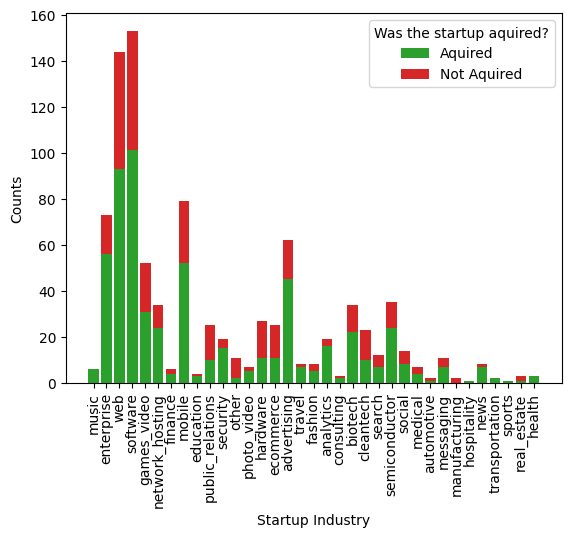

In [33]:
#Visualize the crosstab
fig, ax = plt.subplots()

categories = df['category_code'].unique()
aquired = []
not_aquired = []
for i in range(len(categories)):
  category = categories[i]
  aquired.append(crosstab[category][1])
  not_aquired.append(crosstab[category][0])


bar1 = plt.bar(categories,aquired,color='tab:green',label="Aquired");
bar2 = plt.bar(categories,not_aquired,bottom=aquired, color='tab:red',label="Not Aquired");

ax.set_ylabel('Counts')
ax.set_xlabel('Startup Industry')

ax.legend(title='Was the startup aquired?',loc="upper right")
plt.xticks(rotation=90)

plt.show()

__Conclusion:__

To summarize, we explored the relationship between startup industry and success using the metric of it being an aquired company. Using ANOVA hypothesis testing, we rejected the hypothesis that the mean number of aquired companies is the same among all startup industries. In addition, we can conclude from our bar graph that industries like enterprise, web, software, and mobile have the most counts of aquired and not aquired startups. Although, its unclear if certain startup industries were over or under represented in the dataset without investigating the process of data-collection from the original dataset

##**Conclusion 2:**

__Intro:__

Are there States that are better suited for certain startup industries? How does State and Industry Affect Success of Startups?

__Background:__

People consider California a Tech startup haven. Is this true? Are the odds of success in tech startups higher in California?

In order to view this we need a vizualization method that can handle 3 variables, but more specifically 2 categorical variables and their effect on a numerical variable. The best method we thought of for this is a Heat Map as it can have 2 cateogorical variables spread on the X & Y with a summary statistic of the numerical variable in the cells (we chose average rate of success).

__Exploratory Analysis__

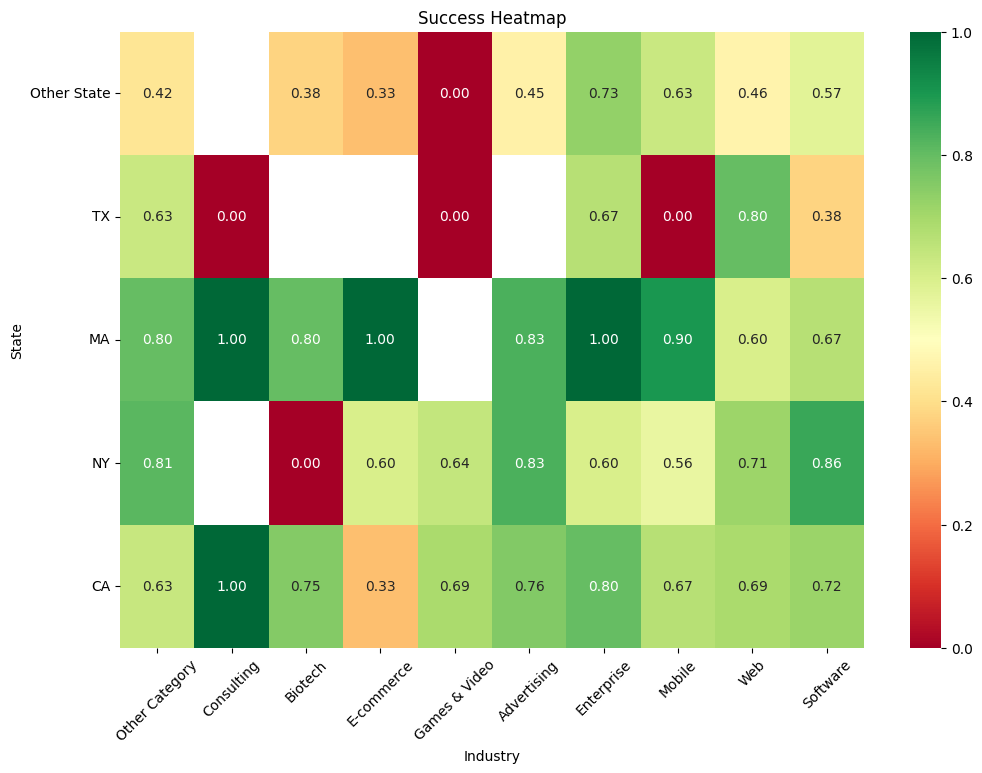

In [34]:
heatmap_data = df.groupby(['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
                           'is_software', 'is_web', 'is_mobile', 'is_enterprise',
                           'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                           'is_biotech', 'is_consulting', 'is_othercategory'])['labels'].mean().reset_index()

heatmap_data = heatmap_data.pivot_table(index=['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],
                                        columns=['is_software', 'is_web', 'is_mobile', 'is_enterprise',
                                                 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                                                 'is_biotech', 'is_consulting', 'is_othercategory'],
                                        values='labels', aggfunc='mean')

state_labels = ['CA', 'NY', 'MA', 'TX', 'Other State'][::-1]
industry_labels = ['Software', 'Web', 'Mobile', 'Enterprise', 'Advertising',
                   'Games & Video', 'E-commerce', 'Biotech', 'Consulting', 'Other Category'][::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data[1:], cmap='RdYlGn', annot=True, fmt=".2f", cbar=True)
plt.title('Success Heatmap')
plt.xlabel('Industry')
plt.xticks(ticks=np.arange(len(industry_labels)) + 0.5, labels=industry_labels, rotation=45)
plt.ylabel('State')
plt.yticks(ticks=np.arange(len(state_labels))  + 0.5, labels=state_labels, rotation=0)
plt.show()

There are a lot of cells with `1.0` or `0.0` as their rate of success this is suspicous as it's hard to believe all the startups were succesful. This indicates that there may be some category combinations with not a lot of data points, so let's graph the frequency of the categories to make sure we don't skew our conclusions with low sample size for certain category combinations.

Additionally, there are certain cells that don't have any numbers. This is ok though, as it simply means there was no data on those combinations (Nan value instead of 0). And this lack of data can still tell us a decent amount. For example Texas may not have had a lot of big Biotech startups when this dataset was made, or perhaps the data collectors didn't take that demographic of startup into account by some flaw in their data collection.

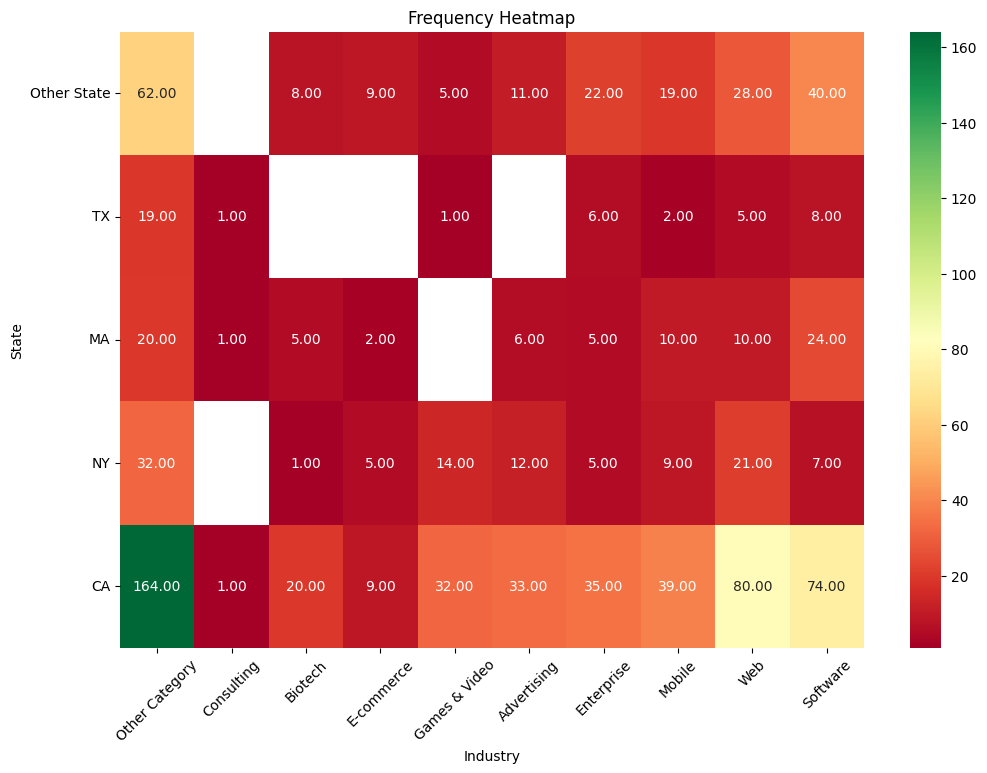

In [35]:
heatmap_data = df.groupby(['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
                           'is_software', 'is_web', 'is_mobile', 'is_enterprise',
                           'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                           'is_biotech', 'is_consulting', 'is_othercategory']).count().reset_index()

heatmap_data = heatmap_data.pivot_table(index=['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],
                                        columns=['is_software', 'is_web', 'is_mobile', 'is_enterprise',
                                                 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                                                 'is_biotech', 'is_consulting', 'is_othercategory'],
                                        values='labels', aggfunc='mean')

state_labels = ['CA', 'NY', 'MA', 'TX', 'Other State'][::-1]
industry_labels = ['Software', 'Web', 'Mobile', 'Enterprise', 'Advertising',
                   'Games & Video', 'E-commerce', 'Biotech', 'Consulting', 'Other Category'][::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data[1:], cmap='RdYlGn', annot=True, fmt=".2f", cbar=True)
plt.title('Frequency Heatmap')
plt.xlabel('Industry')
plt.xticks(ticks=np.arange(len(industry_labels)) + 0.5, labels=industry_labels, rotation=45)
plt.ylabel('State')
plt.yticks(ticks=np.arange(len(state_labels))  + 0.5, labels=state_labels, rotation=0)
plt.show()

__It is clear that CA & Other Category are an outlier__ as they are skewing the data by having copious amounts of entries, so to get a better look at the rest of the data we remove them and graph again below.

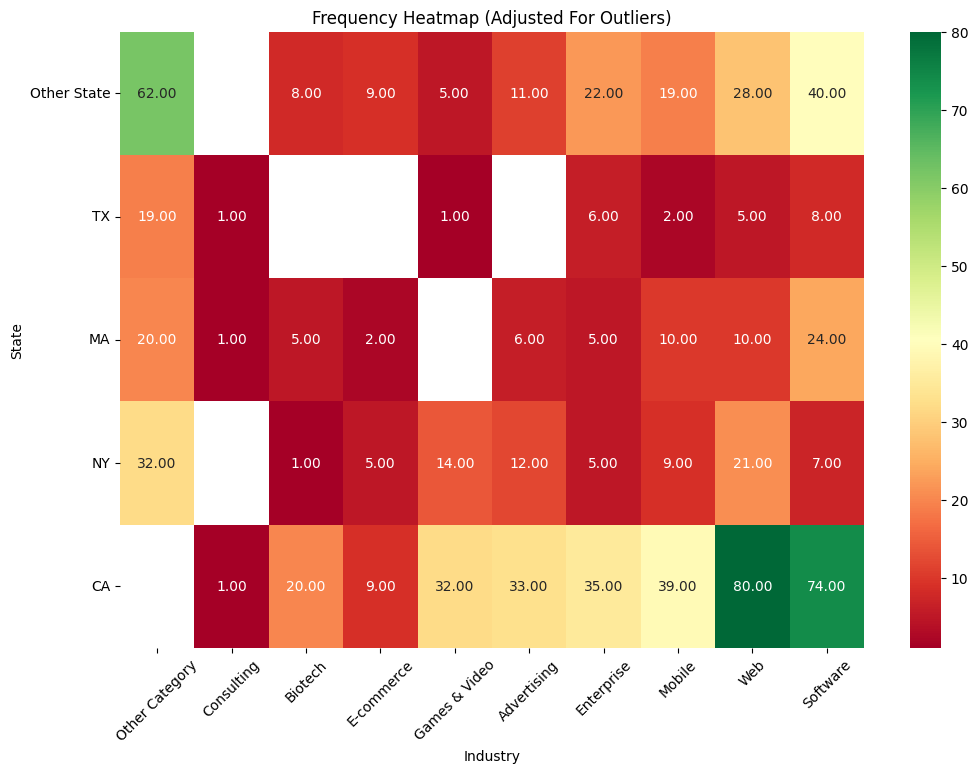

In [36]:
heatmap_data = df[~((df['is_CA'] == 1) & (df['is_othercategory'] == 1))].groupby(['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
                           'is_software', 'is_web', 'is_mobile', 'is_enterprise',
                           'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                           'is_biotech', 'is_consulting', 'is_othercategory']).count().reset_index()

heatmap_data = heatmap_data.pivot_table(index=['is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],
                                        columns=['is_software', 'is_web', 'is_mobile', 'is_enterprise',
                                                 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                                                 'is_biotech', 'is_consulting', 'is_othercategory'],
                                        values='labels', aggfunc='mean')

state_labels = ['CA', 'NY', 'MA', 'TX', 'Other State'][::-1]
industry_labels = ['Software', 'Web', 'Mobile', 'Enterprise', 'Advertising',
                   'Games & Video', 'E-commerce', 'Biotech', 'Consulting', 'Other Category'][::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data[1:], cmap='RdYlGn', annot=True, fmt=".2f", cbar=True)
plt.title('Frequency Heatmap (Adjusted For Outliers)')
plt.xlabel('Industry')
plt.xticks(ticks=np.arange(len(industry_labels)) + 0.5, labels=industry_labels, rotation=45)
plt.ylabel('State')
plt.yticks(ticks=np.arange(len(state_labels))  + 0.5, labels=state_labels, rotation=0)
plt.show()

__Conclusion:__

There are many combinations that have very few data points (less than 10), so we can't trust the results of them. However there are a decent amount of data points for certain combinations, which we can make conclusions from. Firstly, software in California is pretty succesfull with a .72 average succes rate. NY & Other Category and CA & Enterprise seem to be the categories with the heighest success rates (0.80+) while also maintaining a high number of data points (30+).

##**Conclusion 3:**

__Intro__

Another point of interest is the relationship between funding rounds and success.

__Background__

Startups go through 4 main funding rounds: A, B, C, & D. When a startup first goes looking for money after having an initial product they will call it their A round of funding. As the company gets older and/or their product changes they will go for B, C, & D funding rounds. Generally funding rounds are done sequentially (it woud be rare to see a D round after an A round), but there are cases (for example: a long time inbetween funding rounds, pivot in company purpose, etc) that this is done.








__Exploratory Analysis__

### Graph 1:
Below we try to visualize how many companies succeded based what funding rounds they went through.

In [37]:
round_columns = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'labels']

grouped = df.groupby(round_columns)['labels'].count()
grouped = grouped.unstack().fillna(0)

fig, ax = plt.subplots()

bottom = np.zeros(len(grouped.index))
bars = []
for column in grouped.columns:
    bar = ax.bar([str(index) for index in grouped.index], grouped[column], bottom=bottom, label=column)
    bars.append(bar)
    bottom += grouped[column]

ax.set_ylabel('Amount Of Companies')
ax.set_xlabel('Funding Rounds (A,B,C,D)')

legend_labels = {'0': 'Failed', '1': 'Succeeded'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] if label in legend_labels else label for label in labels]
ax.legend(handles, new_labels, title='Status', loc="upper right")
plt.xticks(rotation=45)

plt.show()

KeyboardInterrupt: 

Some interesting things to notice in this graph are that the bars tend to follow a downward trend as they go the right (inverse relationship between # companies and amount of funding rounds).
You can also notice that continous funding rounds (None, A, AB, ABC, ABCD) have the most amount of companies, likely because most companies follow that paradigm.

### Graph 2:
Below we try to visualize the percent of companies that succeded based what funding rounds they went through.

In [ ]:
round_columns = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'labels']

grouped = df.groupby(round_columns)['labels'].count()

grouped = grouped.unstack().fillna(0)

grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

fig, ax = plt.subplots()

bottom = np.zeros(len(grouped_normalized.index))
bars = []
for column in grouped_normalized.columns:
    bar = ax.bar([str(index) for index in grouped_normalized.index], grouped_normalized[column], bottom=bottom, label=column)
    bars.append(bar)
    bottom += grouped_normalized[column]

ax.set_ylabel('Percent of Companies')
ax.set_xlabel('Funding Rounds (A,B,C,D)')

legend_labels = {'0': 'Failed', '1': 'Succeeded'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] if label in legend_labels else label for label in labels]
ax.legend(handles, new_labels, title='Status', loc="upper right")
plt.xticks(rotation=45)

plt.show()

Some things to note are that the more funding rounds companies get tends to be corelated with how succesful they are.

### Graph 3:
Below we try to visualize how the average funding companies recieved influenced their success using the funding rounds they went through.

In [ ]:
round_columns = ['has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'labels']

grouped = df.groupby(round_columns)['funding_total_usd'].mean()
grouped = grouped.unstack().fillna(0)

fig, ax = plt.subplots()

bottom = np.zeros(len(grouped.index))
bars = []
for column in grouped.columns:
    bar = ax.bar([str(index) for index in grouped.index], grouped[column], bottom=bottom, label=column)
    bars.append(bar)
    bottom += grouped[column]

ax.set_ylabel('Average Funding')
ax.set_xlabel('Funding Rounds (A,B,C,D)')

legend_labels = {'0': 'Failed', '1': 'Succeeded'}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] if label in legend_labels else label for label in labels]
ax.legend(handles, new_labels, title='Status', loc="upper right")
plt.xticks(rotation=45)

plt.show()

This graph is less related to the question, but it is still interesting in regards to the question. One can see that (0,1,1,1) could potentially be or have an outlier in the amount of funding recieved. And there doesn't seem to be a corelation between the amount of funding different statups receive and how succesful they are at least not while we account for differences in funding rounds gone through.

__Conclusion:__

Companies that go through all typical rounds of funding (A through D) are more likely to succeed.
From conjecture, we conclude that this is likely not due to the money from the funding, but likely due to the fact that companies can only go through all 4 rounds if investors consistently find their company viable over the span of several years. Though we can't say for sure why, there is definetly a correlation between a startup going through all funding rounds and increased chance of success for a startup.

# __Machine Learning Analysis and Hypothesis Testing__

For this step of the data-science pipeline, we want to construct a ML model that can help us predict a successful startup and validate our previous data analysis. In order to address this prompt, we decided to make a Decision Tree ML model and extract the features that yield the highest prediction accuracy.
However, we'd like to mention that some other possible ML models that could be applied here is K-Modes to find meaningful features using Clustering or a variation of an Auto-Encoder Neural Network to find the optimal feature set.

In [ ]:
df

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,CA,42,-71,92101,6669,San Diego,Bandsintown,1,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,CA,37,-121,95032,16283,Los Gatos,TriCipher,1,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,CA,32,-117,92121,65620,San Diego,Plixi,1,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,CA,37,-122,95014,42668,Cupertino,Solidcore Systems,1,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,CA,37,-122,94105,65806,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37,-122,94107,21343,San Francisco,CoTweet,1,2009-01-01,NaT,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1
919,MA,42,-71,1803,41747,Burlington,Reef Point Systems,0,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1
920,CA,37,-122,94089,31549,Sunnyvale,Paracor Medical,0,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1
921,CA,37,-122,94404,33198,San Francisco,Causata,1,2009-01-01,NaT,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1


## Decision Tree

### Converting `df` to `df_dt`, by modifying the columns

Drop:
* `id`
* `name`
* `closed_at` (one won't know that the startup has closed until it fails, so this shouldn't be included)

Create One Hots For:
* `city`

Pre-Existing One Hot (Need To Get Rid Of):
* `state_code` = [
  `is_CA`,
  `is_NY`,
  `is_MA`,
  `is_TX`,
  `is_otherstate` ]
* `category_code` = [
  `is_software`,
  `is_web`,
  `is_mobile`,
  `is_enterprise`,
  `is_advertising`,
  `is_gamesvideo`,
  `is_ecommerce`,
  `is_biotech`,
  `is_consulting`,
  `is_othercategory` ]
* `_` = [
  `has_VC`,
  `has_angel`,
  `has_roundA`,
  `has_roundB`,
  `has_roundC`,
  `has_roundD` ]


In [78]:
df_dt = df

#### Deal With NaNs in `age_first_milestone_year` and `age_last_milestone_year`

Check if All NaNs Corespond to milestones = 0

In [79]:
print(df_dt[(df_dt['age_first_milestone_year'].isna() & df_dt['age_last_milestone_year'].isna()) & (df_dt['milestones'] == 0)].equals(df_dt[df_dt['milestones'] == 0]))

True


Thus we need to convert all NaNs to 0 as that makes the most sense in this context.

In [80]:
df_dt = df_dt.fillna(0)

#### Do The actual converting

In [81]:
# Drop columns
columns_to_drop = [
  'id',
  'name',
  'closed_at',
  'state_code',
  'category_code'
]
df_dt = df_dt.drop(columns=columns_to_drop)

# Create one-hot encoding for `city` column
df_dt = pd.get_dummies(df_dt, columns=['city'], prefix='is_city')

df_dt = df_dt.fillna(0)

#### Convert date-time columns into floats (As date-times don't work with sklearn's decision tree)

In [87]:
columns_to_floatify = [
  'age_first_funding_year',
  'age_last_funding_year',
  'age_first_milestone_year',
  'age_last_milestone_year'
]
for col in columns_to_floatify:
  if df_dt[col].dtypes == "datetime64[ns]":
    df_dt[col] = (df_dt[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [93]:
for col in columns_to_floatify:
  print(f"{col.ljust(24)} | {df_dt[col].dtype} | [{df_dt[col].min():.2f} , {df_dt[col].max():.2f}] | NaNs: {df_dt[col].isna().sum()}")

age_first_funding_year   | float64 | [-9.05 , 21.90] | NaNs: 0
age_last_funding_year    | float64 | [-9.05 , 21.90] | NaNs: 0
age_first_milestone_year | float64 | [-14.17 , 24.68] | NaNs: 0
age_last_milestone_year  | float64 | [-7.01 , 24.68] | NaNs: 0


### Show df_dt

In [94]:
df_dt

,latitude,longitude,zip_code,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_city_Acton,is_city_Addison,is_city_Alameda,is_city_Albuquerque,is_city_Aliso Viejo,is_city_Allentown,is_city_Alpharetta,is_city_Altamonte Springs,is_city_Andover,is_city_Annapolis,is_city_Arcadia,is_city_Arlington,is_city_Atlanta,is_city_Austin,is_city_Avon,is_city_Bala Cynwyd,is_city_Bedford,is_city_Bellevue,is_city_Belmont,is_city_Berkeley,is_city_Berwyn,is_city_Bethesda,is_city_Bethlehem,is_city_Beverly Hills,is_city_Billerica,is_city_Bingham Farms,is_city_Bloomfield,is_city_Boston,is_city_Bothell,is_city_Boulder,is_city_Boxborough,is_city_Brisbane,is_city_Brooklyn,is_city_Broomfield,is_city_Burlingame,is_city_Burlington,is_city_Calabasas,is_city_Cambridge,is_city_Campbell,is_city_Canton,is_city_Carlsbad,is_city_Carpinteria,is_city_Centennial,is_city_Champaign,is_city_Chantilly,is_city_Charlottesville,is_city_Chelmsford,is_city_Chevy Chase,is_city_Chicago,is_city_Cincinnati,is_city_Cleveland,is_city_College Park,is_city_Columbia,is_city_Columbus,is_city_Conshohocken,is_city_Cupertino,is_city_Dallas,is_city_Dedham,is_city_Denver,is_city_Dulles,is_city_Duluth,is_city_Durham,is_city_El Segundo,"is_city_El Segundo,",is_city_Emeryville,is_city_Englewood,is_city_Evanston,is_city_Farmington,is_city_Foster City,is_city_Framingham,is_city_Frederick,is_city_Freedom,is_city_Fremont,is_city_Glendale,is_city_Golden Valley,is_city_Greenwood Village,is_city_Hampton,is_city_Hartford,is_city_Henderson,is_city_Herndon,is_city_Hillsborough,is_city_Hollywood,is_city_Houston,is_city_Idaho Falls,is_city_Indianapolis,is_city_Irvine,is_city_Itasca,is_city_Jersey City,is_city_Kansas City,is_city_Kearneysville,is_city_Kenmore,is_city_Kirkland,is_city_La Jolla,is_city_Laguna Niguel,is_city_Lake Oswego,is_city_Lancaster,is_city_Larkspur,is_city_Las Vegas,is_city_Lawrenceville,is_city_Lexington,is_city_Lindon,is_city_Lisle,is_city_Little Rock,is_city_Littleton,is_city_Long Island City,is_city_Longmont,is_city_Los Altos,is_city_Los Angeles,is_city_Los Gatos,is_city_Louisville,is_city_Loveland,is_city_Lowell,is_city_Manchester,is_city_Marlborough,is_city_Maynard,is_city_McLean,is_city_Memphis,is_city_Menlo Park,is_city_Middleton,is_city_Milpitas,is_city_Minneapolis,is_city_Minnetonka,is_city_Moffett Field,is_city_Monterey Park,is_city_Morgan Hill,is_city_Mountain View,is_city_NW Atlanta,is_city_NY,is_city_NYC,is_city_Napa,is_city_Naperville,is_city_Nashua,is_city_Nashville,is_city_Needham,is_city_New Hope,is_city_New York,is_city_New York City,is_city_Newport Beach,is_city_Newton,is_city_North Billerica,is_city_North Hollywood,is_city_North Reading,is_city_Oakland,is_city_Palo Alto,is_city_Paramus,is_city_Pasadena,is_city_Petaluma,is_city_Philadelphia,is_city_Pittsboro,is_city_Pittsburgh,is_city_Plano,is_city_Playa Vista,is_city_Pleasanton,is_city_Plymouth,is_city_Portland,is_city_Potomac Falls,is_city_Princeton,is_city_Providence,is_city_Provo,is_city_Puyallup,is_city_Raleigh,is_city_Red Bank,is_city_Redmond,is_city_Redwood City,is_city_Reston,is_city_Richardson,is_city_Rye Brook,is_city_SPOKANE,is_city_Saint Louis,is_city_Saint Paul,is_city_Salt Lake City,is_city_San Bruno,is_city_San Carlos,is_city_San Diego,is_city_San Francisco,is_city_San Franciso,is_city_San Jose,is_city_San Mateo,is_city_San Rafael,is_city_Santa Ana,is_city_Santa Barbara,is_city_Santa Clara,is_city_Santa Monica,is_city_Scotts Valley,is_city_Seattle,is_city_Solana Beach,is_city_Somerset,is_city_Somerville,is_city_South San Francisco,is_city_Sterling,is_city_Sunnnyvale,is_city_Sunnyvale,is_city_Tampa,is

### Make Decision Tree

In [108]:
X = df_dt.drop(['labels','is_top500'], axis=1)  # Features
y = df_dt['labels']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the decision tree model
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.772972972972973


In [110]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

|--- age_last_milestone_year <= 1.61
|   |--- funding_total_usd <= 12275000.00
|   |   |--- relationships <= 3.50
|   |   |   |--- is_city_Sunnyvale <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- is_city_Sunnyvale >  0.50
|   |   |   |   |--- class: 1
|   |   |--- relationships >  3.50
|   |   |   |--- age_first_milestone_year <= 0.31
|   |   |   |   |--- class: 0
|   |   |   |--- age_first_milestone_year >  0.31
|   |   |   |   |--- class: 1
|   |--- funding_total_usd >  12275000.00
|   |   |--- age_first_funding_year <= 7.70
|   |   |   |--- relationships <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- relationships >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age_first_funding_year >  7.70
|   |   |   |--- class: 0
|--- age_last_milestone_year >  1.61
|   |--- founded_at <= 936100800.00
|   |   |--- class: 0
|   |--- founded_at >  936100800.00
|   |   |--- relationships <= 8.50
|   |   |   |--- founded_at <= 1056326400.00
|   |   |   |   |--- class: 1
|   |   | 

The Age of the last milestone year seems to be the most important feature in determining successs. Though this is likely due to to the fact that companies that fail, fail earlier than 1.61 years.

Some other features that are important are:
* `funding_total_usd`
* `relationships`
* `founded_at`
* `age_first_funding_year`
* `age_first_milestone_year`
* `is_city_Sunnyvale`

Thus, we must remove the features that are more of a post death look. Anything that's "last" won't be known until the startup either dies or the data is collected. We want to see what features are present at the start of the starup and are not caused by the final state of the startup.

### Let's Just Look At The Raw Entropy

In [118]:
# Assuming df is your DataFrame
entropies = {}
for column in X.columns:
    feature_values = X[column].value_counts(normalize=True)
    entropies[column] = entropy(feature_values)

# Sort the entropies dictionary by values (entropy values) in descending order
sorted_entropies = sorted(entropies.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 features with the highest entropy
print("Top features with the highest entropy:")
for feature, entropy_value in sorted_entropies[:10]:
    print(f" {entropy_value:.2f} | {feature}")

Top features with the highest entropy:
 6.53 | age_last_funding_year
 6.40 | last_funding_at
 6.13 | age_first_funding_year
 6.09 | first_funding_at
 5.80 | funding_total_usd
 5.48 | age_last_milestone_year
 5.28 | zip_code
 5.06 | age_first_milestone_year
 4.25 | founded_at
 3.01 | relationships


As one would expect the decision tree and raw entropies agree on the most impactful features.

## K-Means | Goal: compare `is_top500` and `labels`

### Converting `df` to `df_km`, by modifying the columns

Drop:
* `id`
* `name`
* `closed_at` (one won't know that the startup has closed until it fails, so this shouldn't be included)

Pre-Existing One Hot:
* `state_code` = [
  `is_CA`,
  `is_NY`,
  `is_MA`,
  `is_TX`,
  `is_otherstate` ]
* `category_code` = [
  `is_software`,
  `is_web`,
  `is_mobile`,
  `is_enterprise`,
  `is_advertising`,
  `is_gamesvideo`,
  `is_ecommerce`,
  `is_biotech`,
  `is_consulting`,
  `is_othercategory` ]
* `_` = [
  `has_VC`,
  `has_angel`,
  `has_roundA`,
  `has_roundB`,
  `has_roundC`,
  `has_roundD` ]

Potential One Hots:
* `city` = [?]

Columns In Need Of Scaling:
* `latitude`
* `longitude`
* `zip_code`
* `founded_at`
* `closed_at`
* `first_funding_at`
* `last_funding_at`
* `age_first_funding_year`
* `age_last_funding_year`
* `age_first_milestone_year`
* `age_last_milestone_year`
* `relationships`
* `funding_rounds`
* `funding_total_usd`
* `milestones`



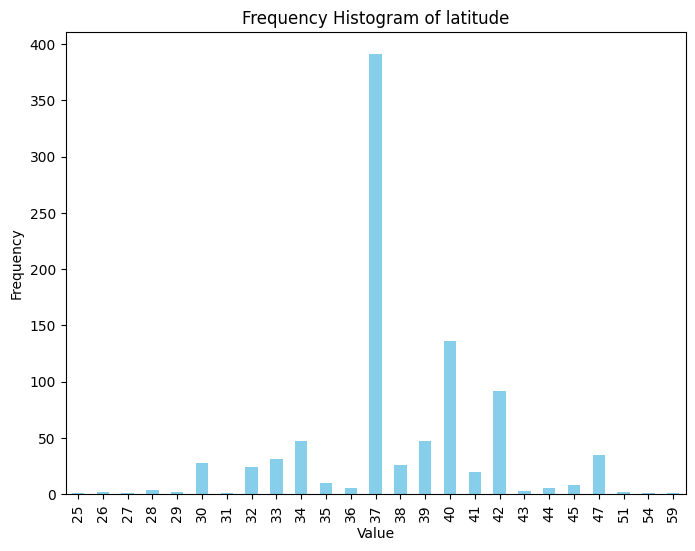

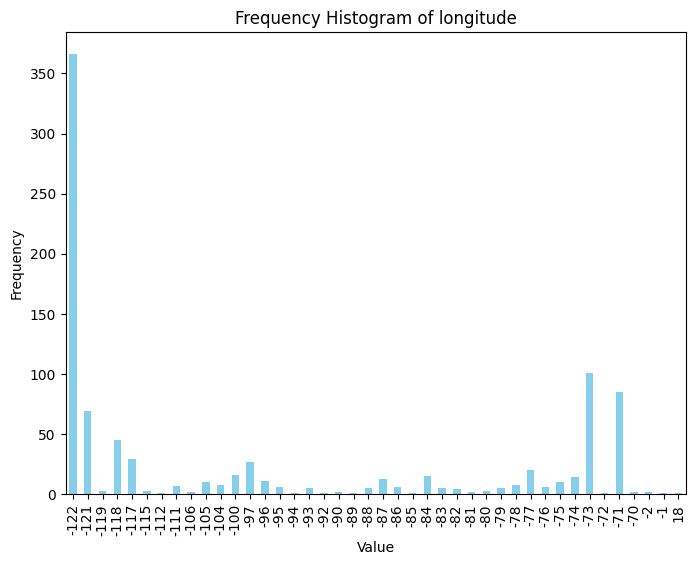

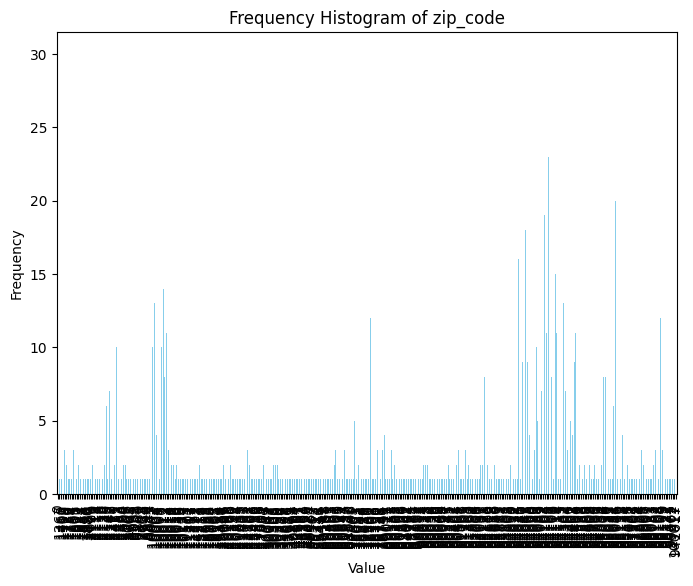

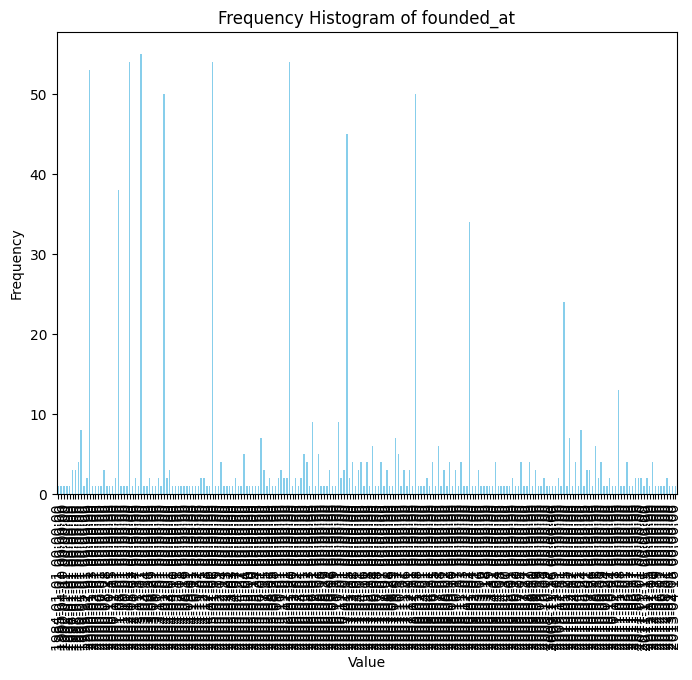

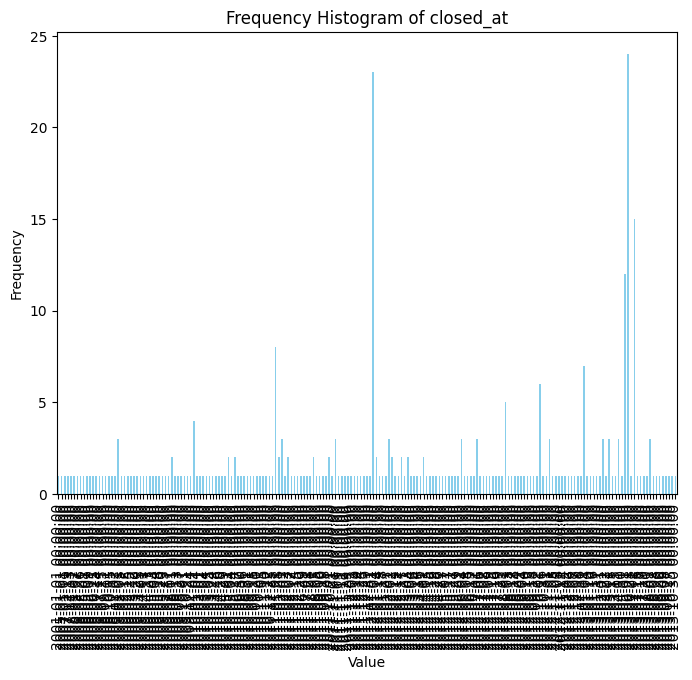

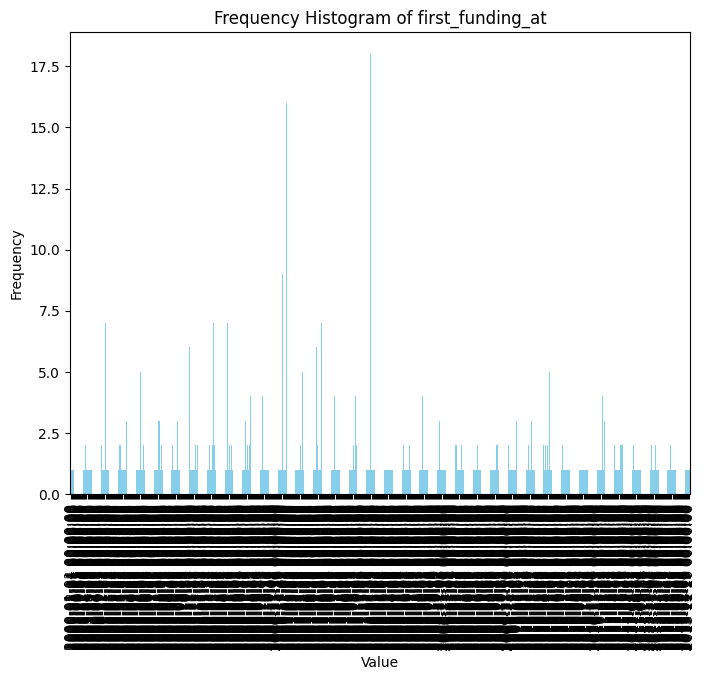

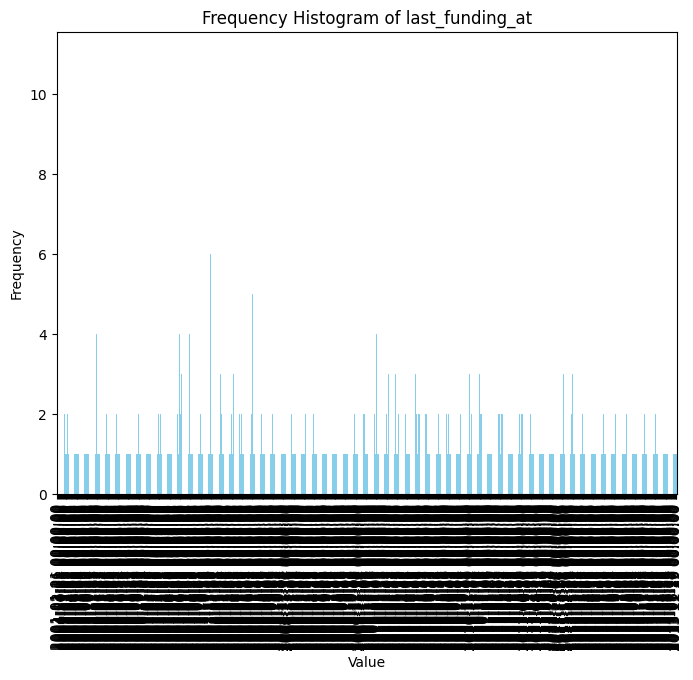

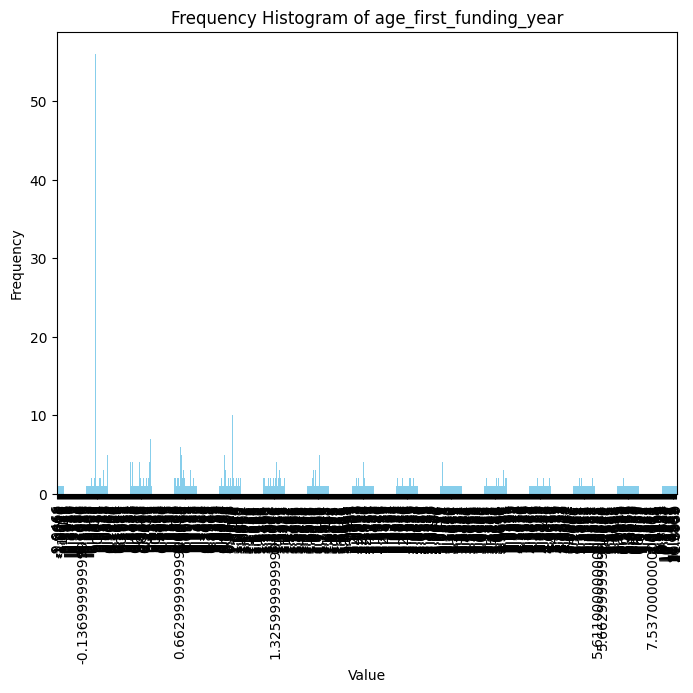

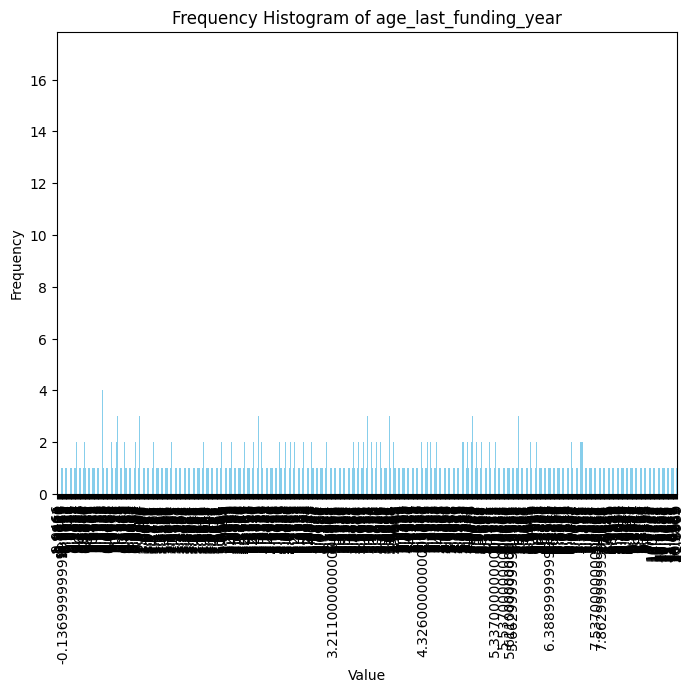

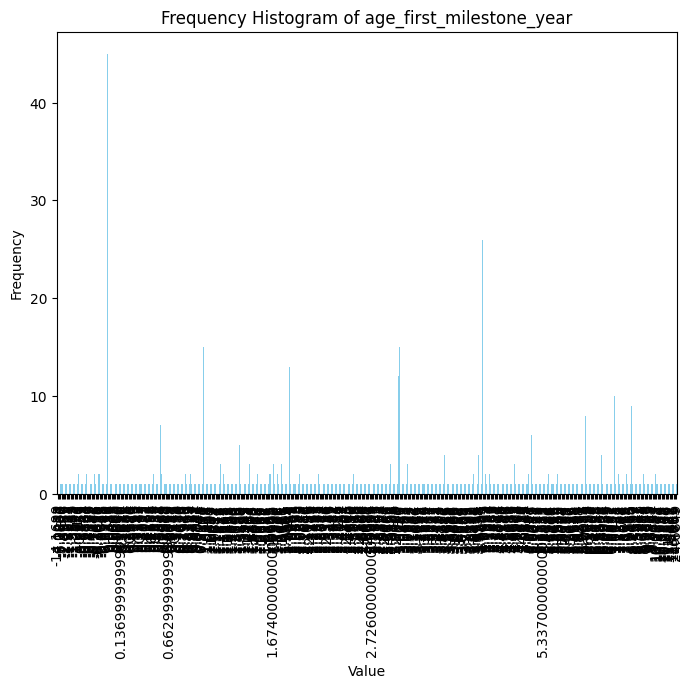

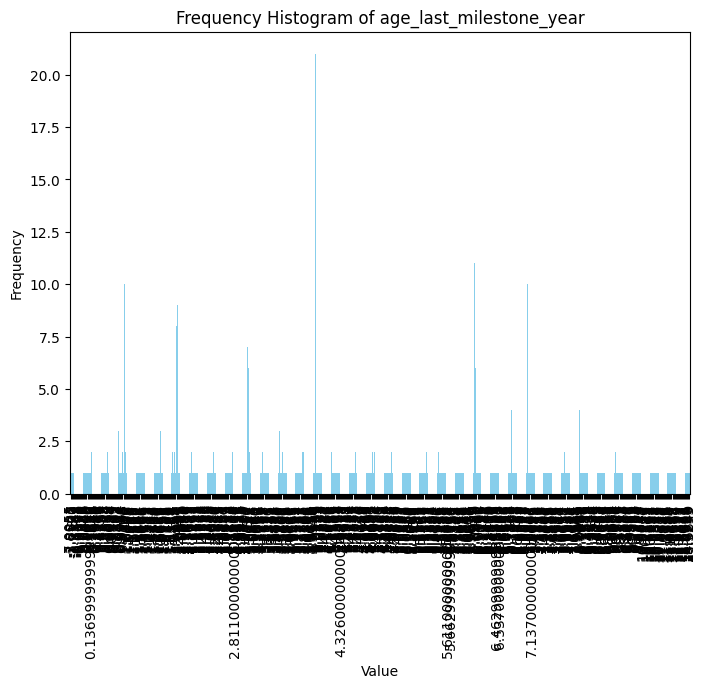

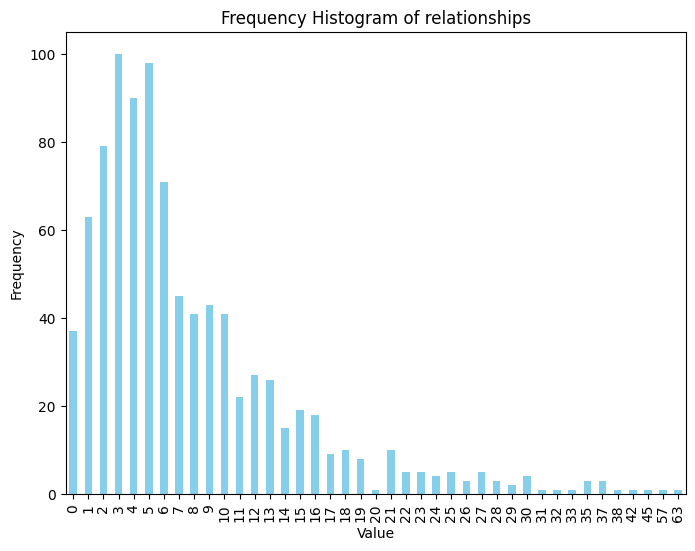

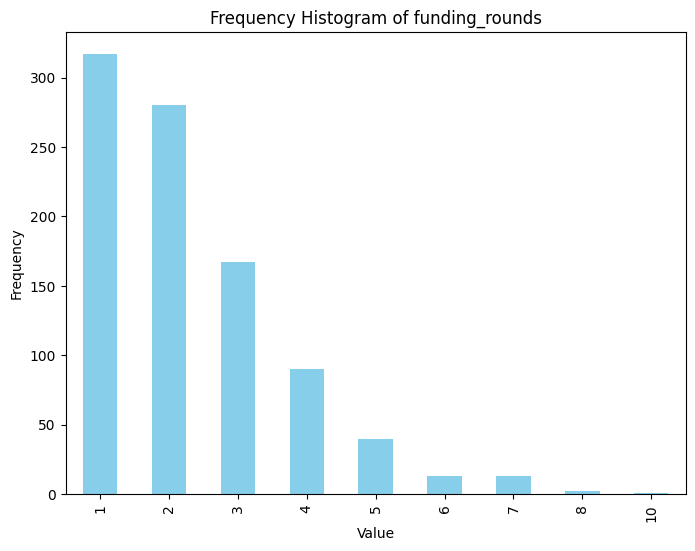

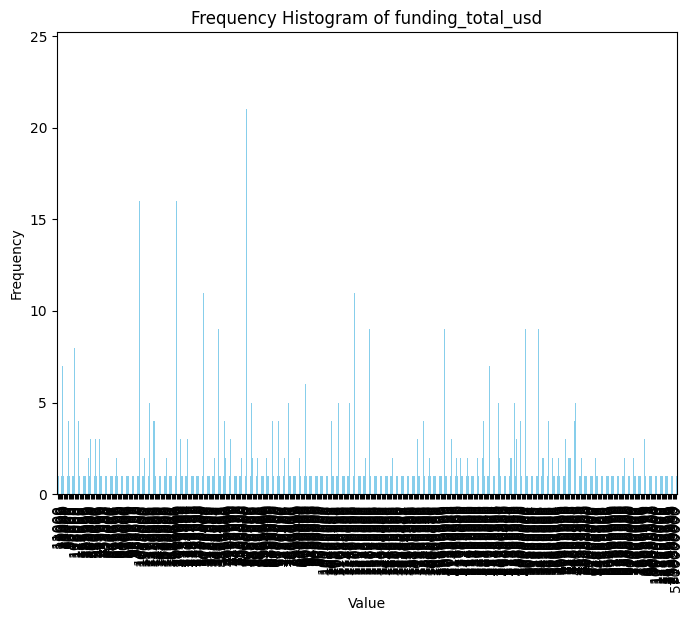

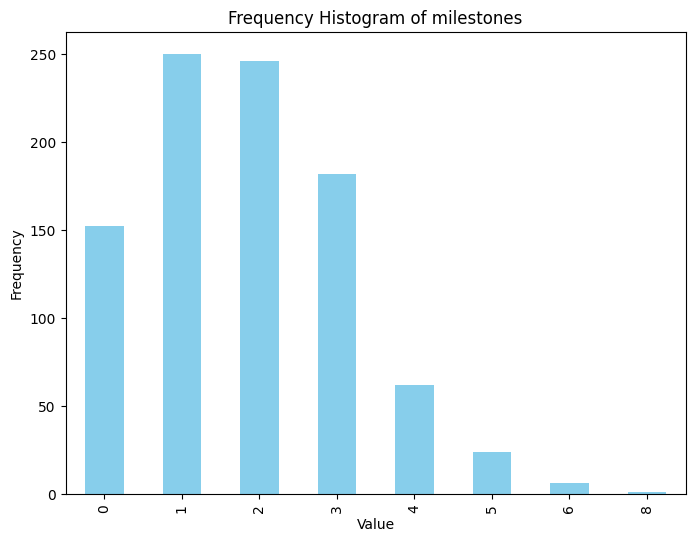

In [122]:
# List of column names
columns_to_plot = [
  'latitude',
  'longitude',
  'zip_code',
  'founded_at',
  'closed_at',
  'first_funding_at',
  'last_funding_at',
  'age_first_funding_year',
  'age_last_funding_year',
  'age_first_milestone_year',
  'age_last_milestone_year',
  'relationships',
  'funding_rounds',
  'funding_total_usd',
  'milestones'
]

# Plot frequency histogram for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

`relationships`, `funding_rounds`, and `milestones` are all aproxamately normally distributed, but do have a little skew. So we could use standardization instead of min-max scaling for them, but then we would have only a few features that have a considerable portion of their values outside the range of 0 to 1; thus, those features would be weighted more in K-means. So we will stick to min-max scaling for all the numerical features.

Though, first we'll have to check if they need a log transform for their skew.



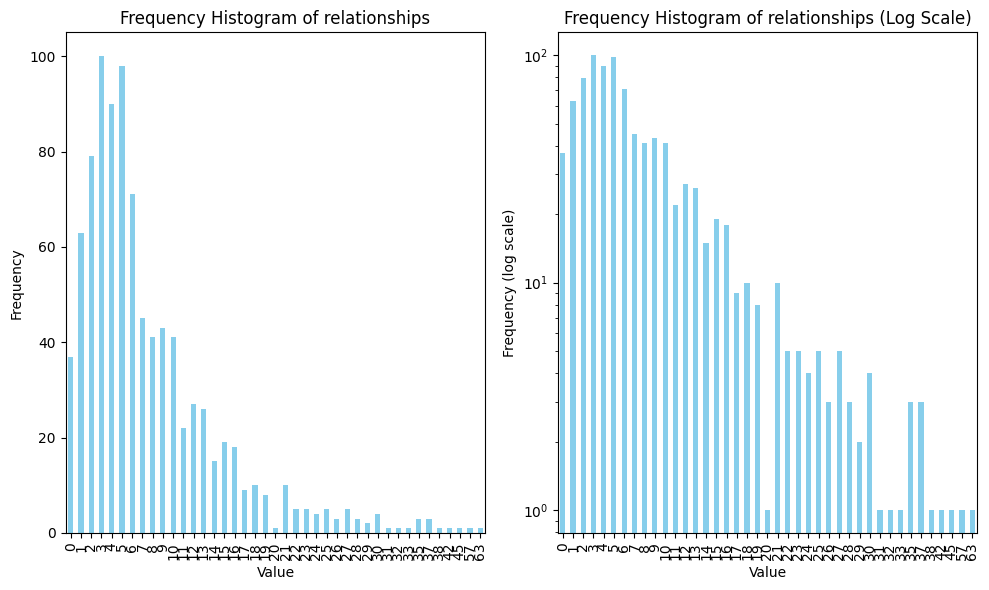

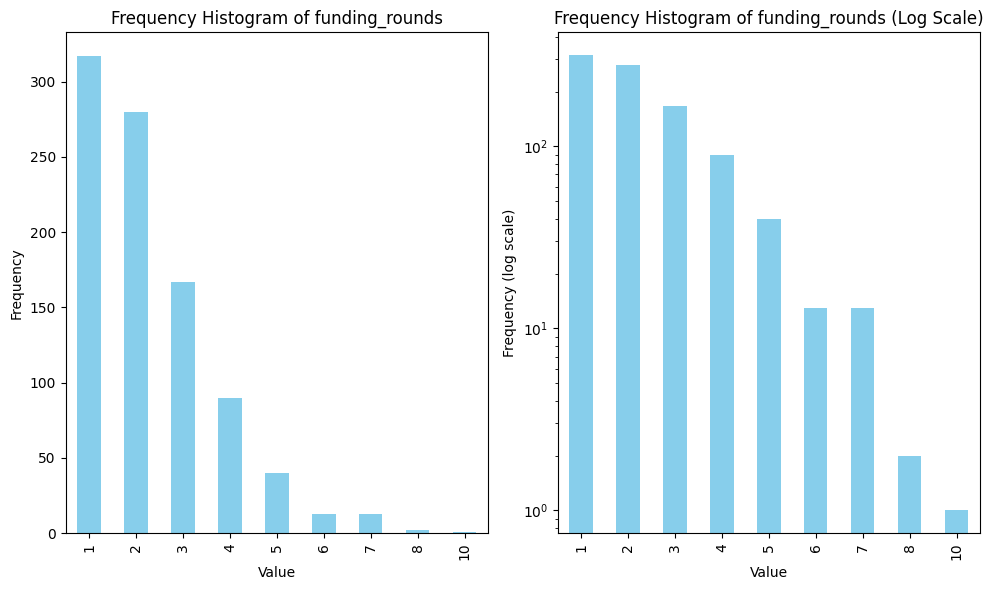

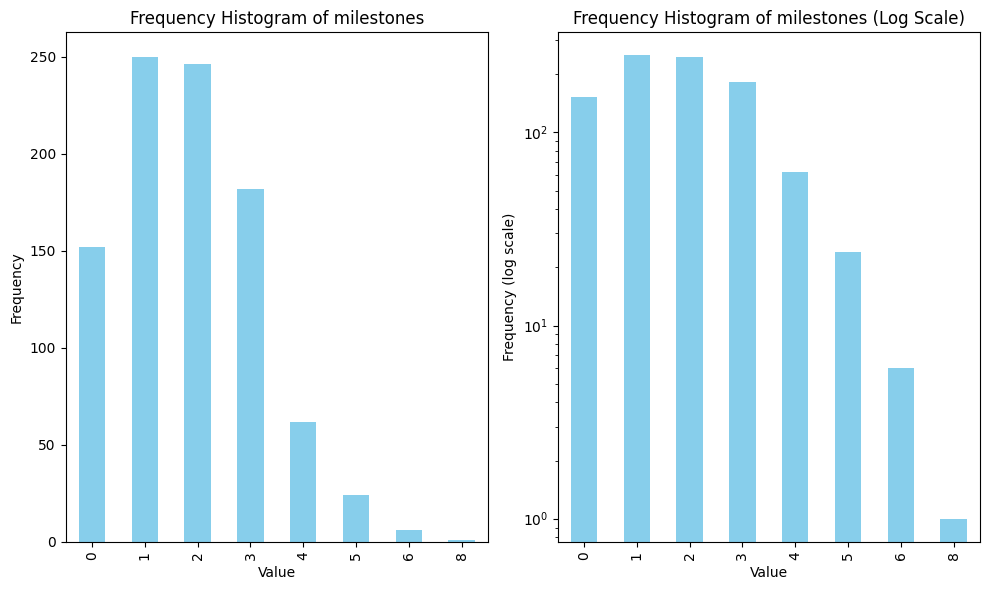

In [123]:
# List of column names
columns_to_plot = [
  'relationships',
  'funding_rounds',
  'milestones'
]

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))

    # Plot regular histogram
    plt.subplot(1, 2, 1)
    df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Plot histogram with logarithmic scale
    plt.subplot(1, 2, 2)
    df[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.yscale('log')  # Apply logarithmic scale to y-axis
    plt.title(f'Frequency Histogram of {column} (Log Scale)')
    plt.xlabel('Value')
    plt.ylabel('Frequency (log scale)')

    plt.tight_layout()
    plt.show()

Log Transform didn't fix the skew, so we're just going to min-max scale all the collumns.

In [124]:
df_km = df

### Deal With NaNs in `age_first_milestone_year` and `age_last_milestone_year`

Check if All NaNs Corespond to milestones = 0

In [125]:
print(df_km[(df_km['age_first_milestone_year'].isna() & df_km['age_last_milestone_year'].isna()) & (df_km['milestones'] == 0)].equals(df_km[df_km['milestones'] == 0]))

True


Thus we need to convert all NaNs to 0 as that makes the most sense in this context.

In [126]:
df_km = df_km.fillna(0)

### Apply Transforms:

Drop:
* `id`
* `name`
* `closed_at`
* `state_code`
* `category_code`

Create One Hots For:
* `city`

Min Max Scale:
* `latitude`
* `longitude`
* `zip_code`
* `founded_at`
* `first_funding_at`
* `last_funding_at`
* `age_first_funding_year`
* `age_last_funding_year`
* `age_first_milestone_year`
* `age_last_milestone_year`
* `relationships`
* `funding_rounds`
* `funding_total_usd`
* `milestones`



In [127]:
# Create one-hot encoding for 'city' column
# df_km = pd.get_dummies(df, columns=['city'], prefix='is_city')

# Drop columns
columns_to_drop = [
  'id',
  'name',
  'city',
  'closed_at',
  'state_code',
  'category_code'
]
df_km = df.drop(columns=columns_to_drop)


# Min-max scale numeric columns
columns_to_scale = [
  'latitude',
  'longitude',
  'zip_code',
  'founded_at',
  'first_funding_at',
  'last_funding_at',
  'age_first_funding_year',
  'age_last_funding_year',
  'age_first_milestone_year',
  'age_last_milestone_year',
  'relationships',
  'funding_rounds',
  'funding_total_usd',
  'milestones'
]

# Convert date-time columns into floats
for col in columns_to_scale:
  if df[col].dtypes == "datetime64[ns]":
    df_km[col] = (df[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df_km = df_km.fillna(0)

scaler = MinMaxScaler()
df_km[columns_to_scale] = scaler.fit_transform(df_km[columns_to_scale])



### Check that the Min Max Scaling Worked:

In [128]:
# print(f"DataType{df_km[columns_to_scale].dtypes}")
for col in columns_to_scale:
  print(f"{col.ljust(24)} | {df_km[col].dtype} | [{df_km[col].min()} , {df_km[col].max()}] | NaNs: {df_km[col].isna().sum()}")

latitude                 | float64 | [0.0 , 1.0] | NaNs: 0
longitude                | float64 | [0.0 , 1.0] | NaNs: 0
zip_code                 | float64 | [0.0 , 1.0] | NaNs: 0
founded_at               | float64 | [0.0 , 1.0] | NaNs: 0
first_funding_at         | float64 | [0.0 , 1.0] | NaNs: 0
last_funding_at          | float64 | [0.0 , 1.0] | NaNs: 0
age_first_funding_year   | float64 | [0.0 , 1.0] | NaNs: 0
age_last_funding_year    | float64 | [0.0 , 1.0] | NaNs: 0
age_first_milestone_year | float64 | [0.0 , 1.0] | NaNs: 0
age_last_milestone_year  | float64 | [0.0 , 1.0] | NaNs: 0
relationships            | float64 | [0.0 , 1.0] | NaNs: 0
funding_rounds           | float64 | [0.0 , 1.0] | NaNs: 0
funding_total_usd        | float64 | [0.0 , 1.0] | NaNs: 0
milestones               | float64 | [0.0 , 1.0] | NaNs: 0


### View The Modified `df_km` before performing K-Means

In [129]:
df_km

,latitude,longitude,zip_code,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.500000,0.364286,0.097874,1,0.785287,0.666009,0.698470,0.365061,0.389409,0.484841,0.432611,0.047619,0.222222,0.000064,0.375,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,0.352941,0.007143,0.100989,1,0.546270,0.368888,0.697620,0.458030,0.615461,0.544988,0.442121,0.142857,0.333333,0.007033,0.125,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,0.205882,0.035714,0.097895,1,0.860722,0.737579,0.717170,0.325749,0.325749,0.402200,0.290656,0.079365,0.000000,0.000454,0.250,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,0.352941,0.000000,0.100969,1,0.614601,0.369479,0.489800,0.393572,0.464142,0.519179,0.410478,0.079365,0.222222,0.007016,0.125,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,0.352941,0.000000,0.100004,0,0.907553,0.762027,0.872928,0.292368,0.346291,0.365677,0.222272,0.031746,0.111111,0.000226,0.125,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.352941,0.000000,0.100006,1,0.853617,0.685528,0.661071,0.309102,0.309102,0.379636,0.363880,0.142857,0.000000,0.000191,0.250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1
919,0.500000,0.364286,0.001916,0,0.478033,0.377957,0.482788,0.526742,0.590579,0.519179,0.410478,0.015873,0.222222,0.009121,0.125,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1
920,0.352941,0.000000,0.099987,0,0.512152,0.539432,0.503612,0.566939,0.566939,0.596462,0.505232,0.079365,0.000000,0.007717,0.125,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1
921,0.352941,0.000000,0.100321,1,0.853617,0.702879,0.840629,0.316894,0.383922,0.384220,0.342094,0.190476,0.111111,0.002717,0.250,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1


### Apply K-Means

Find the best k via Elbow Method

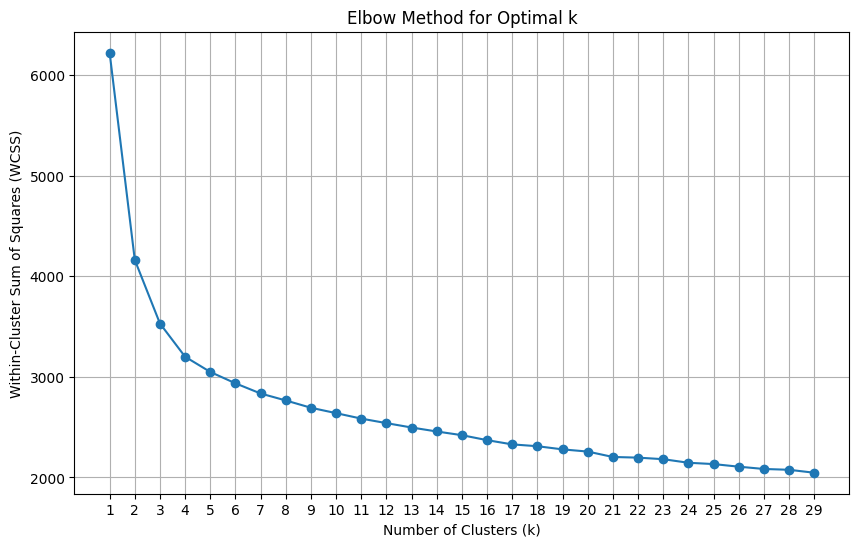

In [130]:
wcss = []
labels_lst = []
is_top500_lst = []
num_ks = 30
for k in range(1, num_ks):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(df_km)
    wcss.append(kmeans.inertia_)

    # cluster_labels = kmeans.labels_
    # df_km['cluster'] = cluster_labels
    # cluster_means = df_km.groupby('cluster')['labels'].mean()

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_ks), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, num_ks, 1))
plt.grid(True)
plt.show()

Thus optimal k is 4.

In [131]:
# Fit KMeans with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
kmeans.fit(df_km)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Create DataFrame to store centroids
centroids_df = pd.DataFrame(centroids, columns=df_km.columns)

column_ranges = centroids_df.apply(lambda col: col.max() - col.min())


top_n = 12

# Sort the column ranges in descending order
sorted_ranges = column_ranges.sort_values(ascending=False)

# Get the top x columns with the largest range
top_x_columns = sorted_ranges.head(top_n)

# Print the top x columns with the largest range
print(f"Top {top_n} columns with the largest range:")
print(top_x_columns)

# # Calculate difference between centroids of each cluster
# centroid_diff = centroids_df.diff()

# # Sort centroid differences to identify top differentiating features
# top_features_indices = centroid_diff.sort_values(ascending=False).index[:5]  # Choose top 5 features

# feature_names = df_km.columns

# # Map indices to feature names
# top_features = feature_names[top_features_indices]

# # # Print top differentiating features
# # print("Top differentiating features between clusters:")
# # for feature in top_features:
# #     print(f"- {feature}")

# centroids_df
# centroid_diff

Top 12 columns with the largest range:
avg_participants    7.220286
has_roundB          0.509211
is_top500           0.487408
labels              0.339136
has_roundA          0.302153
has_roundC          0.300909
has_angel           0.257290
has_roundD          0.222940
is_otherstate       0.211609
is_CA               0.207310
is_web              0.170096
has_VC              0.148086
dtype: float64


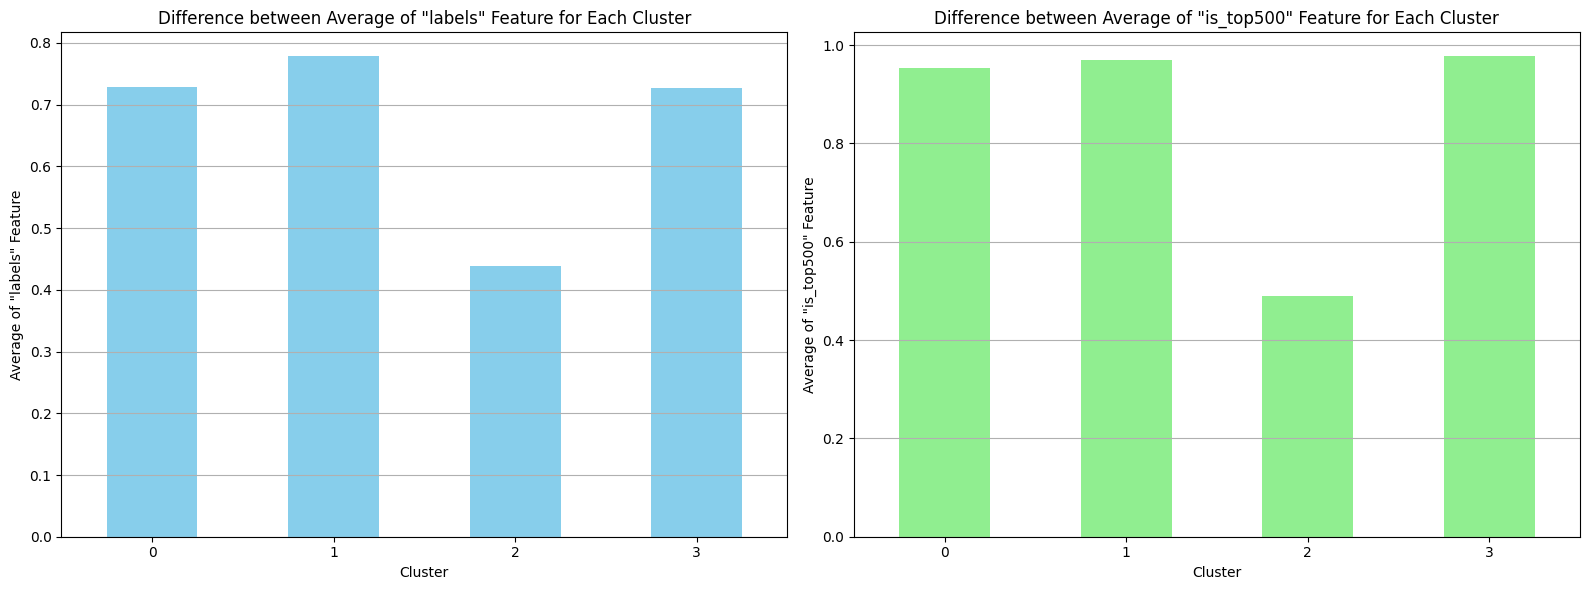

In [132]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df_km['cluster'] = cluster_labels

# Calculate the mean of the 'labels' feature for each cluster
cluster_means = df_km.groupby('cluster')['labels'].mean()

# Calculate the mean of the 'is_top500' feature for each cluster
top500_means = df_km.groupby('cluster')['is_top500'].mean()

# Plot both 'labels' and 'is_top500' features in separate bar charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 'labels' feature
cluster_means.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Difference between Average of "labels" Feature for Each Cluster')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average of "labels" Feature')
ax1.set_xticks(range(len(cluster_means)))
ax1.set_xticklabels(cluster_means.index, rotation=0)
ax1.grid(axis='y')

# Plot 'is_top500' feature
top500_means.plot(kind='bar', color='lightgreen', ax=ax2)
ax2.set_title('Difference between Average of "is_top500" Feature for Each Cluster')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Average of "is_top500" Feature')
ax2.set_xticks(range(len(top500_means)))
ax2.set_xticklabels(top500_means.index, rotation=0)
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

Run A T-Test on the cluster `labels` variation

In [133]:
# Calculate the overall mean of the 'labels' feature
overall_mean = df_km['labels'].mean()

# Perform t-test for each cluster mean against the overall mean
for cluster, mean in cluster_means.items():
    t_statistic, p_value = ttest_ind(df_km[df_km['cluster'] == cluster]['labels'],
                                      df_km['labels'],
                                      equal_var=False)
    print(f"Cluster {cluster} vs. Overall Mean:")
    print(f"T-statistic: {t_statistic:<6.2f} | P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("REJECT null hypothesis: significant difference.\n")
    else:
        print("FAIL to reject null hypothesis: NO significant difference.\n")

Cluster 0 vs. Overall Mean:
T-statistic: 2.96   | P-value: 3.15e-03
REJECT null hypothesis: significant difference.

Cluster 1 vs. Overall Mean:
T-statistic: 3.96   | P-value: 9.11e-05
REJECT null hypothesis: significant difference.

Cluster 2 vs. Overall Mean:
T-statistic: -6.31  | P-value: 6.34e-10
REJECT null hypothesis: significant difference.

Cluster 3 vs. Overall Mean:
T-statistic: 1.15   | P-value: 2.54e-01
FAIL to reject null hypothesis: NO significant difference.



Run A T-Test on the cluster `is_top500` variation

In [134]:
# Calculate the overall mean of the 'labels' feature
overall_mean = df_km['is_top500'].mean()

# Perform t-test for each cluster mean against the overall mean
for cluster, mean in cluster_means.items():
    t_statistic, p_value = ttest_ind(df_km[df_km['cluster'] == cluster]['is_top500'],
                                      df_km['is_top500'],
                                      equal_var=False)
    print(f"Cluster {cluster} vs. Overall Mean:")
    print(f"T-statistic: {t_statistic:<6.2f} | P-value: {p_value:.2e}")
    if p_value < 0.05:
        print("REJECT null hypothesis: significant difference.\n")
    else:
        print("FAIL to reject null hypothesis: NO significant difference.\n")

Cluster 0 vs. Overall Mean:
T-statistic: 8.47   | P-value: 7.15e-17
REJECT null hypothesis: significant difference.

Cluster 1 vs. Overall Mean:
T-statistic: 9.16   | P-value: 5.05e-19
REJECT null hypothesis: significant difference.

Cluster 2 vs. Overall Mean:
T-statistic: -10.03 | P-value: 2.35e-21
REJECT null hypothesis: significant difference.

Cluster 3 vs. Overall Mean:
T-statistic: 6.42   | P-value: 1.10e-08
REJECT null hypothesis: significant difference.



Index(['avg_participants', 'has_roundB', 'has_roundA', 'has_roundC',
       'has_angel', 'has_roundD', 'is_otherstate', 'is_CA', 'is_web',
       'has_VC'],
      dtype='object')


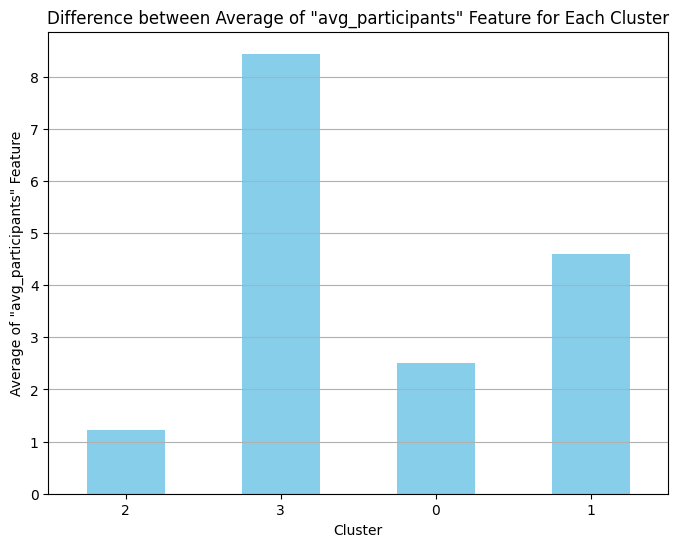

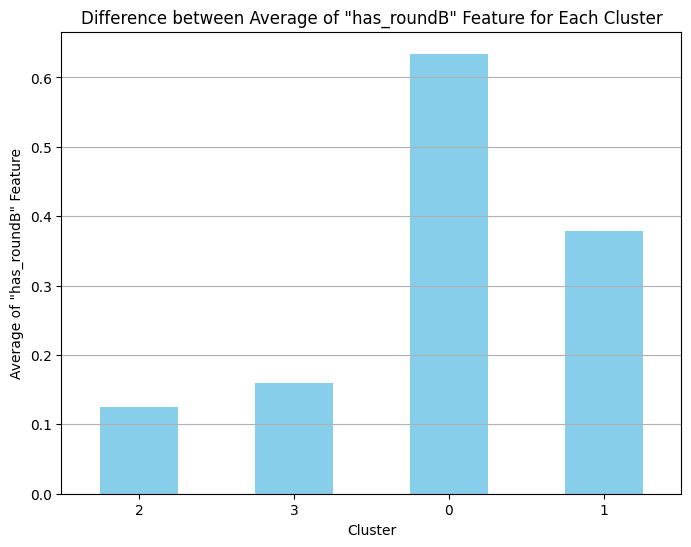

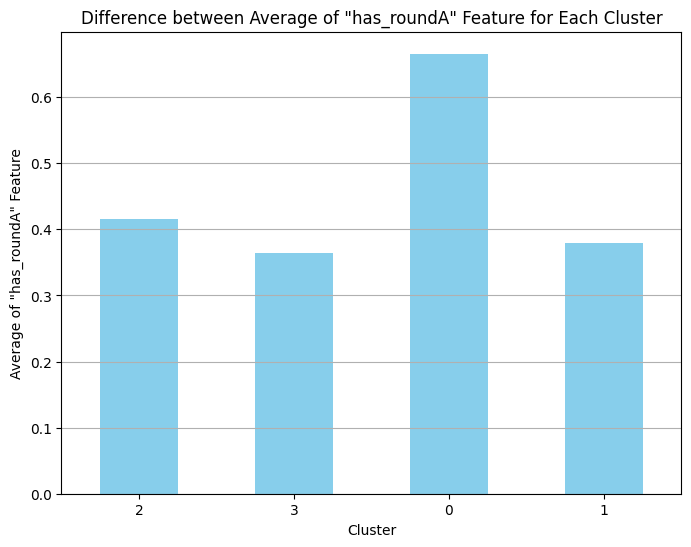

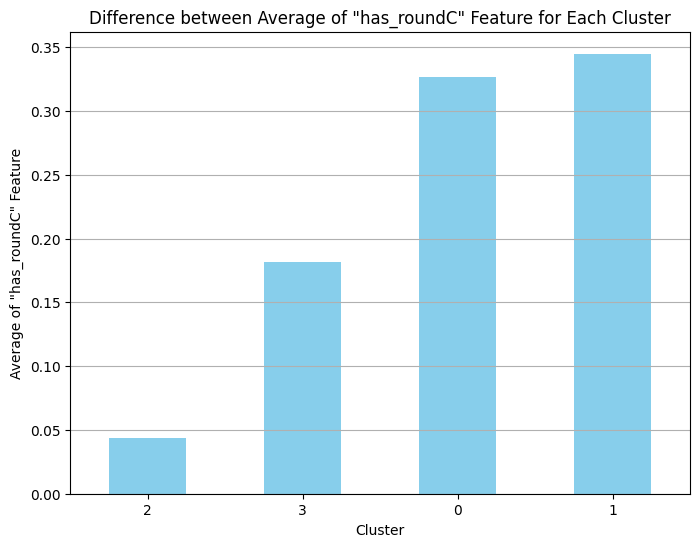

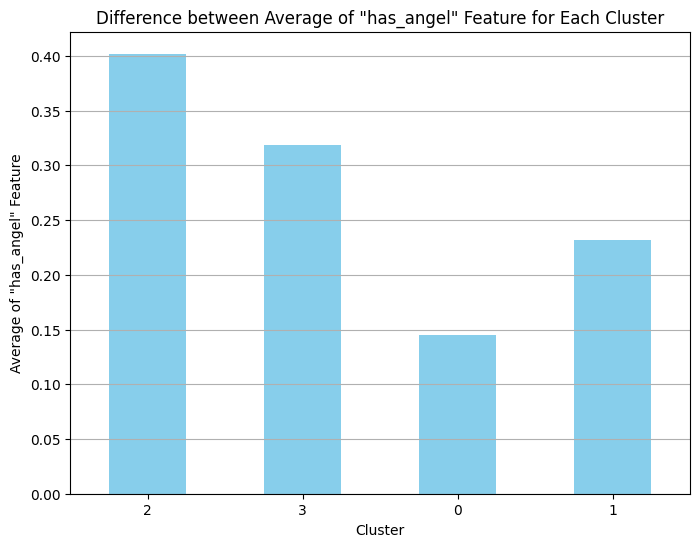

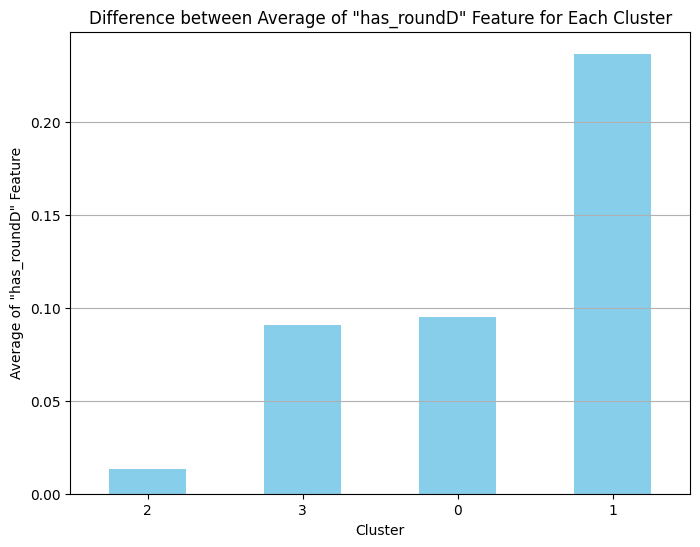

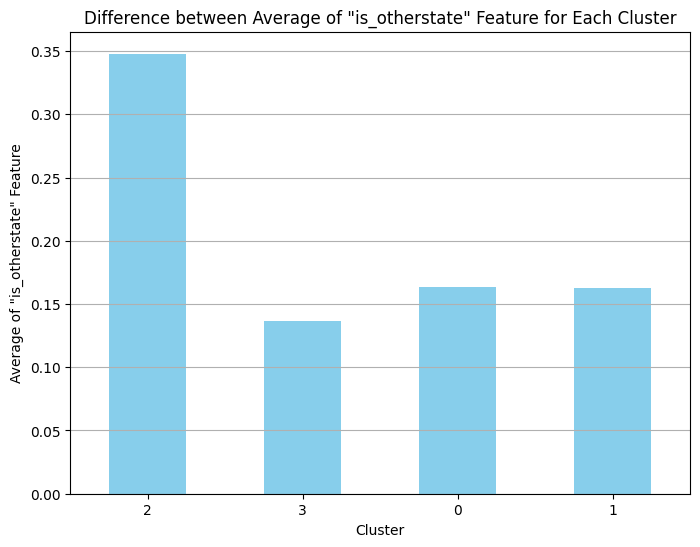

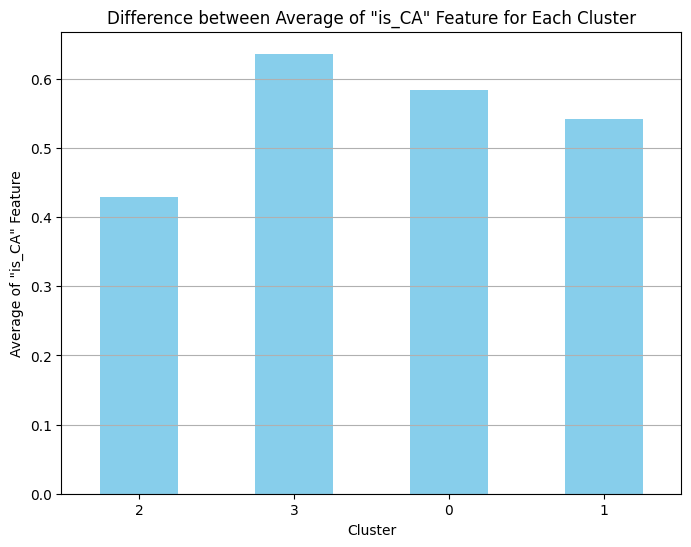

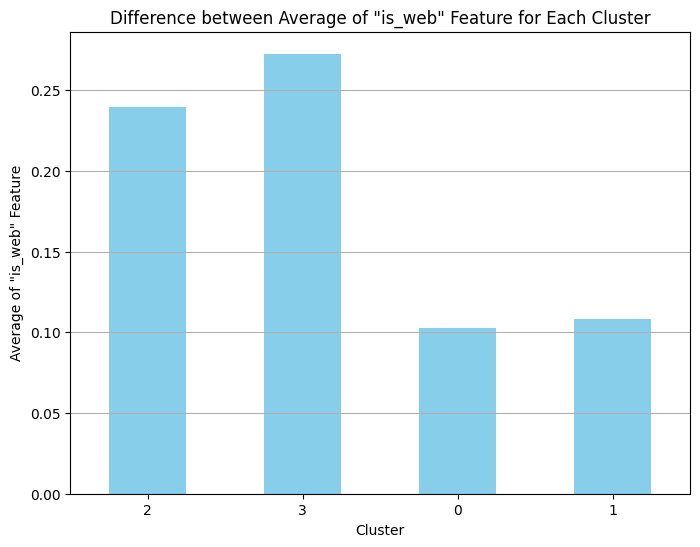

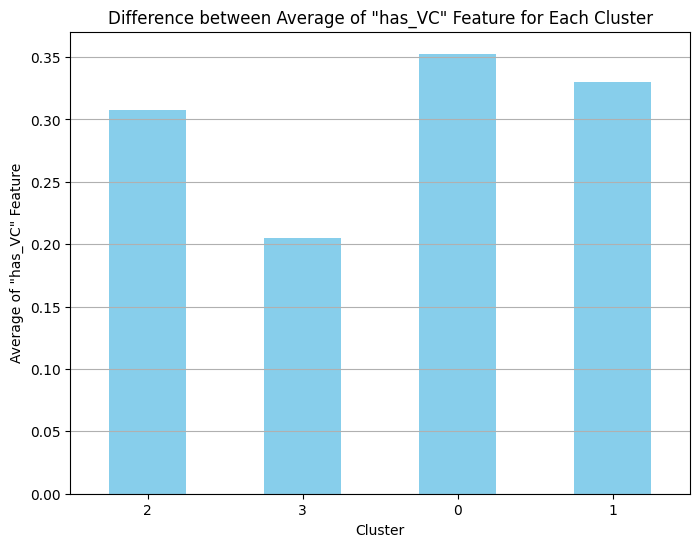

In [135]:
columns_to_plot = top_x_columns.index

if 'is_top500' in columns_to_plot:
  columns_to_plot = columns_to_plot.drop('is_top500')
if 'labels' in columns_to_plot:
  columns_to_plot = columns_to_plot.drop('labels')

print(columns_to_plot)

for col in columns_to_plot:
  # Calculate the mean of the 'labels' feature for each cluster and sort clusters by it
  sorted_clusters = df_km.groupby('cluster')['labels'].mean().sort_values().index

  # Calculate the mean of the feature 'col' for each cluster
  cluster_means = df_km.groupby('cluster')[col].mean()

  # Plot the difference between cluster means with bars sorted based on mean 'labels' values
  plt.figure(figsize=(8, 6))
  cluster_means.reindex(sorted_clusters).plot(kind='bar', color='skyblue')
  plt.title(f'Difference between Average of "{col}" Feature for Each Cluster')
  plt.xlabel('Cluster')
  plt.ylabel(f'Average of "{col}" Feature')
  plt.xticks(rotation=0)
  plt.grid(axis='y')
  plt.show()

Based on the graphs it seems that the average number of participants (founders and employees) in a startup is the most important measure of success. Where 1 participant indicates likely failure, 4-5 is optimal, and 2-3 have the same chance as 8-9.

### PCA

In [136]:
df_pca_og = df_km.drop(columns=['cluster'])

pca = PCA(n_components=12)
pca.fit(df_pca_og)
X_pca = pca.transform(df_pca_og)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(data=X_pca, columns=component_names)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.844068,0.462758,-0.776709,0.576044,0.566323,-0.754770,0.325456,-0.224485,-0.177365,-0.236079,-0.034433,0.010542
1,2.006690,-0.839082,0.590729,0.644295,-0.711078,-0.526728,0.213245,0.535416,-0.299823,0.170315,-0.215554,0.388556
2,1.174615,-0.225064,-0.928827,-0.350800,-0.216449,0.094758,-0.418293,-0.216543,-0.188050,0.619886,0.387991,-0.171366
3,0.604317,-0.949708,0.249815,0.374491,-0.674658,-0.216678,1.170220,-0.306766,-0.006462,0.036343,-0.160486,-0.170532
4,-1.862314,0.535952,-0.434521,0.725118,-0.595943,-0.304511,-0.341917,0.536735,0.167548,-0.516689,-0.317679,-0.128569
...,...,...,...,...,...,...,...,...,...,...,...,...
918,3.163511,-0.175142,-0.750116,-0.283592,-0.139519,0.231960,-0.379981,-0.400069,-0.055282,0.129921,-0.210929,0.493175
919,-0.178783,0.149388,1.073682,0.598169,0.329527,0.220670,-0.084708,0.339169,0.626485,-0.398126,0.705290,-0.249574
920,5.161809,0.548622,-0.361580,0.574980,-0.580359,0.594745,0.334582,-0.012069,0.075971,0.289415,-0.063545,0.383019
921,-1.797208,-1.056617,-0.323219,-0.267759,-0.335881,0.240999,0.147310,-0.592694,0.026203,-0.550310,0.108261,-0.139835


In [137]:
# Get the PCA components
pca_components = pca.components_

# Create a DataFrame to visualize the PCA components with original feature names
df_pca_components = pd.DataFrame(pca_components, columns=df_pca_og.columns, index=component_names)

# Display the DataFrame
print("PCA Components with Original Feature Names:")
print(df_pca_components)

PCA Components with Original Feature Names:
      latitude  longitude  zip_code    labels  founded_at  first_funding_at  \
PC1  -0.001415  -0.004455  0.000061  0.052078   -0.006435         -0.002471   
PC2   0.027657   0.081436 -0.017035 -0.337490    0.042077          0.104071   
PC3   0.056935   0.122157 -0.030956  0.001370   -0.080901         -0.083681   
PC4  -0.057045  -0.133661  0.032843 -0.247479   -0.053735         -0.012699   
PC5   0.017727   0.057406 -0.007758  0.075107    0.031463          0.026252   
PC6  -0.018580  -0.046826  0.014865 -0.686743   -0.033775         -0.032637   
PC7   0.003372   0.025270 -0.010189 -0.077032   -0.044172         -0.070303   
PC8  -0.005172   0.021249 -0.011157 -0.426294    0.055013          0.003783   
PC9  -0.005724   0.143260 -0.044627 -0.252449   -0.007417         -0.008336   
PC10 -0.007720   0.006889  0.000868  0.044054   -0.054951         -0.059435   
PC11  0.019731   0.017264 -0.008802  0.108699   -0.035684         -0.012190   
PC12 -0.

In [138]:
print("Top indices:", top_indices)

NameError: name 'top_indices' is not defined

In [148]:
# Define the number of top features you want to retrieve
top_n = 5

# Get the absolute values of the PCA components
abs_pca_components = np.abs(pca.components_)

top_features = {}

# Iterate over each principal component
for i, pc in enumerate(abs_pca_components):
    # Get the indices of the top n features that contribute the most to the current principal component
    top_indices = np.argsort(pc)[-top_n:][::-1]

    # Get the corresponding feature names
    top_feature_names = [df_pca_og.columns[index] for index in top_indices]

    for feature in top_feature_names:
      if feature in top_features:
        top_features[feature] += 1
      else:
        top_features[feature] = 1

    # Print the top feature names for the current principal component
    print(f"Top {top_n} features contributing to PC{i+1}: {top_feature_names}")

# Sort the top_features dictionary by count (value) in descending order
sorted_top_features = sorted(top_features.items(), key=lambda x: x[1], reverse=True)

print("-"*50)
for feature, count in sorted_top_features[:10]:
  print(f"{count} : {feature}")

Top 5 features contributing to PC1: ['avg_participants', 'is_top500', 'labels', 'has_roundC', 'is_otherstate']
Top 5 features contributing to PC2: ['has_roundB', 'has_roundA', 'labels', 'is_CA', 'has_angel']
Top 5 features contributing to PC3: ['is_CA', 'has_VC', 'is_otherstate', 'has_angel', 'has_roundC']
Top 5 features contributing to PC4: ['is_CA', 'has_roundA', 'is_othercategory', 'has_VC', 'labels']
Top 5 features contributing to PC5: ['is_othercategory', 'is_software', 'has_VC', 'has_roundA', 'is_CA']
Top 5 features contributing to PC6: ['labels', 'has_roundA', 'has_angel', 'is_otherstate', 'is_NY']
Top 5 features contributing to PC7: ['has_VC', 'has_roundA', 'has_roundC', 'has_roundB', 'is_software']
Top 5 features contributing to PC8: ['is_software', 'labels', 'has_roundB', 'has_angel', 'has_roundC']
Top 5 features contributing to PC9: ['is_otherstate', 'is_NY', 'is_MA', 'labels', 'is_CA']
Top 5 features contributing to PC10: ['is_web', 'has_roundB', 'has_roundC', 'has_angel', 

# __Insights and Conclusions__

Let's put all the feature rankings in a table together to get a better understanding.

| Decision Tree         (SV) | Entropy               (SV) | K-Means      (USV) | PCA       (USV) |
|----------------------------|----------------------------|--------------------|-----------------|
| `age_last_milestone_year`  | `age_last_funding_year`    | `avg_participants` | `has_angel`     |
| `funding_total_usd`        | `last_funding_at`          | `cluster`          | `labels`        |
| `founded_at`               | `age_first_funding_year`   | `has_roundB`       | `has_roundC`    |
| `relationships`            | `first_funding_at`         | `has_roundA`       | `has_roundA`    |
| `age_first_funding_year`   | `funding_total_usd`        | `has_roundC`       | `has_roundB`    |
| `is_city_Sunnyvale`        | `age_last_milestone_year`  | `has_angel`        | `is_CA`         |
| `age_first_milestone_year` | `zip_code`                 | `has_roundD`       | `is_software`   |
|                            | `age_first_milestone_year` | `is_otherstate`    | `is_otherstate` |
|                            | `founded_at`               | `is_CA`            | `has_VC`        |
|                            | `relationships`            | `is_web`           | `is_web`        |

The interesting thing here is the split betweent the two methods.

The Supervise ML models __(SV)__ had a tendancy to choose __age based__ and __money based__ features.

The Unsupervised ML Models __(USV)__ had a tendancy to choose __investor based__, __location based__, and __industry based__ features.

Now while some of these categories have an overlap intheory -- for example, companies that have high `funding_total_usd` likely have `has_round*` -- but the chosen features were entirely different between the two methods.

Given the wrangling needed to fit the USV methods to this labeled dataset, it would seem better to look at the features the SV methods chose.

Of which, there is a lot of overlap (as one would expect from entropy & decision trees as the former is used in the later).

__It might be helpful to take another look at the decision tree:__


|--- age_last_milestone_year <= 1.61

|   |--- funding_total_usd <= 12275000.00

|   |   |--- relationships <= 3.50

|   |   |   |--- is_city_Sunnyvale <= 0.50

|   |   |   |   |--- class: 0

|   |   |   |--- is_city_Sunnyvale >  0.50

|   |   |   |   |--- class: 1

|   |   |--- relationships >  3.50

|   |   |   |--- age_first_milestone_year <= 0.31

|   |   |   |   |--- class: 0

|   |   |   |--- age_first_milestone_year >  0.31

|   |   |   |   |--- class: 1

|   |--- funding_total_usd >  12275000.00

|   |   |--- age_first_funding_year <= 7.70

|   |   |   |--- relationships <= 0.50

|   |   |   |   |--- class: 0

|   |   |   |--- relationships >  0.50

|   |   |   |   |--- class: 1

|   |   |--- age_first_funding_year >  7.70

|   |   |   |--- class: 0

|--- age_last_milestone_year >  1.61

|   |--- founded_at <= 936100800.00

|   |   |--- class: 0

|   |--- founded_at >  936100800.00

|   |   |--- relationships <= 8.50

|   |   |   |--- founded_at <= 1056326400.00

|   |   |   |   |--- class: 1

|   |   |   |--- founded_at >  1056326400.00

|   |   |   |   |--- class: 1

|   |   |--- relationships >  8.50

|   |   |   |--- founded_at <= 1281960000.00

|   |   |   |   |--- class: 1

|   |   |   |--- founded_at >  1281960000.00

|   |   |   |   |--- class: 0



Based on the tree it seems that companies that have a higher age at their last milestone tend to be more succesful (3/5 that are older that 1.61 y are succesful vs the 3/7 that are younger).

I don't think this tells us much though, as it's relatively straight forward that companies that are older are more likely to succeed; however, this doesn't measure age it measures age of the last milestone which includes how many milestones a company has. This means that companies that have high values for this must have lasted long enough AND constantly be shooting for new milestones within the first roughly 1.5 years.

__The tree also tells us that money raised and relationships made are important.__

The tree gives a lower chance to companies that raise too much too early (`age last milestone <= 1.61 && funding_total_usd > 12275000.00` = success 1/3 vs 2/4 if they raised less than that.)

The number of relationships are important aswell. Startups need to network, but too much networking might become a game of people wrangling that takes away time from the business as the tree gives the best chance of succes for relationships, r, `0.5 < r < 8.5`.